# **Análise de dados com R**: Trabalho 2

<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

**Prof. Ricardo Carubbi**<br>
Atualizado em 16/06/2023

##G2 -  Jean Diniz , San tiago, Daniel Ricarte, Gilmar

## 1 Entrega do trabalho T2
- 03/07/23 (segunda)

## 1.1 Objetivos
Análises numérica e gráfica das variáveis do grupo sob a perspectiva do **dataset desbalanceado** (original) e do **dataset balanceado**.

## 1.2 Exigências

- Comentários são exigidos em **todas as linhas** e permitem o fácil entendimento dos resultados.
- Escolha nomes de variáveis **curtos e abreviados** de fácil leitura.    
- Evite a repetição das linhas de código e, portanto, **use funções** adequadamente.
- Mantenha as **funções curtas**. Funções podem ser aninhadas, ou seja, funções podem existir dentro de outras funções.
- **Use espaços em branco e indentações** adequadamente, ou seja, o uso correto de espaços em branco torna o código mais legível.

## Observações
- Nota composta pela média ponderada do **resultado, legibilidade do código e organização** do notebbok.


## 2 Bibliotecas

In [434]:
# Install and load pacman
install.packages('pacman')
library("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [435]:
# Instala e/ou carraga demais pacotes
p_load('tidyverse','gridExtra','ggplot2')

## 3 Funções

In [436]:
# Função que exibe os estratos do dataset
printStrata <- function(df,ref_var) {

    # Seleção de colunas categóricas
    cols <- colnames(df)
    cols <- cols[!cols %in% ref_var]

    # Lista de nomes de variáveis categóricas
    vars <- c()
    for (col in cols) {
        if (is.factor(df[,col])) {
            vars <- c(vars, col)
        }
    }

    # Verificação dos tamanhos amostrais dos estratos
    for (var in vars) {
        cat('\nEstratos de',var,':\n')
        print(table(df[,ref_var], df[,var]))
    }

}

In [437]:
# Função que exibe um dataframe com números de linhas iguais para cada categoria
options(width = 150)
headS <- function(df,var,ns) {

    # Reprodução do resultado
    set.seed(1)

    # Define as categorias
    lvar <- levels(df[,var])

    # Verifica se a variável tem 2 categorias
    stopifnot((is.factor(df[,var])) & (length(lvar) == 2))

    # Separação em dataframes por categoria
    dfA <- df[df[,var]==lvar[1],]
    dfB <- df[df[,var]==lvar[2],]

    # Junção dos dataframes
    tmp <- rbind(
        sample_n(dfA,ns),
        sample_n(dfB,ns)
    )

    # Exibe o dataframe final
    print(tmp)

}

In [438]:
# Função de balanceamento por subamostragem
balDataset <- function(df,var) {

    # Reprodução do resultado
    set.seed(1)

    # Condição da variável var
    lvar <- levels(df[,var])

    if (length(lvar)==2) {

        # Separação em dataframes por categoria
        dfA <- df[df[,var]==lvar[1],]
        dfB <- df[df[,var]==lvar[2],]

        # Junção dos dataframes
        ns <- min(nrow(dfA), nrow(dfB))
        tmp <- rbind(
            sample_n(dfA,ns),
            sample_n(dfB,ns)
        )

        return(tmp)

    } else {
        cat(
            'Variável', var, 'possui', length(lvar), 'levels.',
            'Apenas variáveis com 2 levels são aceitas!'
        )
    }
}

In [439]:
# Função para converter uma variável quantitativa em categórica
makeFactor <- function(df, var, breaks, labels, include=TRUE) {

    # Verifica se a variável é numérica
    stopifnot(is.numeric(df[,var]))

    vFactor <- cut(
        x = df[,var],
        breaks = breaks,
        labels = labels,
        include.lowest = include
    )

    return(vFactor)
}

In [440]:
#Função para converter colunas por tipo
convCols <- function(df, vars, type = 3,convert_listed=TRUE) {
    all_vars <- names(df)

  if (convert_listed) {
    convert_vars <- intersect(all_vars, vars)
  } else {
    convert_vars <- setdiff(all_vars, vars)
  }
  for (var in convert_vars) {
    if (type == 1) {
      df[[var]] <- as.integer(df[[var]])
    }
    if (type == 2) {
      df[[var]] <- as.factor(df[[var]])
    }
    if (type == 3) {
      df[[var]] <- as.character(df[[var]])
    }
  }

  return(df)
}

In [441]:
# Função para criar uma tabela com valores absolutos e relativos
supertable <- function(df,var) {
    tab <- table(df[,var])
    print(tab)
    round(prop.table(tab)*100,2)
}

In [442]:
# Função para criar uma tabela com valores absolutos e relativos, p/ 2 variáveis
supertable2 <- function(df,var,var2) {
    tabH <- table(df[,var], df[,var2])
    tabH
    propH <- prop.table(tabH, margin = 2)
    round(propH*100,2)
}

In [443]:
#Função para gráfico de barra

barplotmodel <- function(ds,fill,title){

# Define área e resolução de saída da plotagem do gráfico
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 150)

# Conversão da tabela em dataframe
dfH <- as.data.frame(ds)
colnames(dfH) <- c('faixas','grupo','freq')
filename <- NULL

# Média da variável
mean_freq <- mean(dfH$freq)

# Plotar o gráfico de barras
bp <- ggplot(
        data=dfH,
        aes(x=faixas, y=freq, fill=grupo)
        ) +
        # Adicionar linha horizontal
      geom_hline(yintercept = mean_freq,
       color = "red",
       linetype = "dashed",
       size = 1) +
         # Adicionar rótulo da média geral
         geom_text(aes(label = paste("Média Geral:", mean_freq)),
          x = Inf,
          y = mean_freq,
          hjust = 1,
          vjust = -1,
          color = "red",
           size = 3.5) +
         # camada de dados
    geom_bar(
        stat='identity',
        position = position_dodge(),
        colour= '#FFFFFF',
        alpha=.9
        ) + # camada do tipo de gráfico
    geom_text(
        aes(label=freq), position = position_dodge(.9),
        vjust = -.5,
        size = 3.5
        ) + # camada de rótulos
    scale_y_continuous(
        limits=c(0,300),
        breaks = seq(0,250,50)
    ) + # camada de escala do eixo y
    scale_fill_brewer(palette = 'Dark2') + # camada de paleta de cores
    labs(
      fill = fill,
      title = title,
      subtitle = 'Pesquisa realizada no ano 1980',
      caption = 'fonte: Universidade de Stanford'
    ) + # camada de rótulos
    theme_minimal() # camada de tema do gráfico

return(bp)

if (!is.null(filename)) {
    ggsave(
        filename = paste('/content/',filename,'.png', sep=''),
        width=8,
        height=6,
        dpi=300
    )
}
}

#Está produzindo gráficos com valores missing e comprometendo a análise

In [444]:
#Função para gráfico de pizza

pieplotmodel <- function(ds,Fill,Y,Title1){

# Abre o arquivo
 png("hospPie_base.png", width=600, height=600)


# Gráfico de pizza com pacote GRAPHICS p/ Grupo FILL
tabH <- table(subset(ds, TRT==Fill)[,Y])
propH <- prop.table(tabH)

lb = paste(round(propH*100,2), '%', sep='')

pp <- pie(
    tabH,
    labels = lb,
    main = Title1,
    col = colors,
    border = '#FFFFFF'
)
legend(x="topright", legend=rownames(tabH), cex = 0.8, fill = colors)

pp

# Fecha o arquivo
 dev.off
}
#OK

In [445]:
#Função para gráfico de caixas ou velas
boxplotmodel <- function(DF, var1, Main, Xlab) {

  library(RColorBrewer)

  colors <- brewer.pal(5, "Set2")

  options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 150)
  par(mfrow = c(1, 2))

  ref_var <- 'TRT'
  lv <- levels(DF[, ref_var])

  for (l in lv) {
    boxplot(
      formula = formula(paste("QI ~", var1)),
      data = DF[DF$TRT == l, ],
      main = paste(Main, l),
      ylab = 'QI',
      xlab = Xlab,
      ylim = c(20, 150),
      col = colors
    )
    abline(h = mean(DF$QI), col = 'red', lty = 2, lwd = 2)
  }
}
#OK

In [480]:
# Função para agilizar a análise de outliers
outliersmodel <- function(df, var) {
  for (l in levels(df[, var])) {
    cat('\n\n-> Define o intervalo interquartil da variável contínua\n\n')
    value <- subset(df, var==l)
    print(summary(value$QI))

    cat('\n\n-> Define os quartis de indicadores de desempenho\n\n')
    qiQT <- quantile(value$QI)
    print(qiQT)

    cat('\n\n-> Define o valor máximo do whiskers\n\n')
    wskMIN <- qiQT[[2]] - 1.5 * IQR(value$QI)
    print(wskMIN)

    cat('\n\n-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)\n\n')
    outA <- subset(value, QI < wskMIN)
    result <- outA[order(outA$QI, decreasing = TRUE), ]

    print(result)  # Exibe o resultado na tela
    cat('------------------------------------------------\n')
  }
}
# RETORNANDO VALORES VAZIOS

In [447]:
#Outra Função para gráfico de caixas ou velas

boxplot2model <- function(Data,Var,Fill,Title){

# Define área e resolução de saída da plotagem do gráfico
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 150)

bx1 <- ggplot(data = Data, mapping = aes(x=Var, y=QI, fill=TRT)) +
        stat_boxplot(geom = "errorbar") +
        geom_boxplot() +
        scale_fill_brewer(palette="Dark2") +
        geom_hline(
            aes(yintercept=mean(QI)),
            lty=4,
            lwd=1,
            color='red'
        ) +
        annotate(
            "text",
            x = .9,
            y = mean(Data$QI)+5,
            label = paste('Média:',round(mean(Data$QI),2)),
            vjust = -1,
            angle = 0
        ) +
        labs(
            xlab = '',
            fill = Fill,
            title = Title,
            subtitle = 'Pesquisa realizada no ano 1980',
            caption = 'fonte: Universidade de Stanford'
        ) +
        theme_minimal()

ggsave(
    filename = '/content/hospBx.pdf',
    width = 16,
    height = 11,
    units = 'cm',
    bg = 'transparent'
)

bx1

}
# Só trás um gráfico

In [448]:
# Função para criar um gráfico scatterplot robusto.

scatterplotmodel <- function(Data,Var){

# Identifica correlação entre PESO e QI no estrato

# Argumentos
var_split <- Var # variável para divisão dos painéis por categoria
regline <- T # variável que identifica se exibe a regressão linear QI ~ PESO
data <- Data # variável que identifica o dataframe atual
varx <- 'PESO' # variável do eixo x
vary <- 'QI' # variável do eixo y
seqx <- seq(0, 5000, 250) # variável que define os intervalos no eixo x
seqy <- seq(0, 150, 10) # variável que define os intervalos no eixo y
file_name <- 'grafDISP_lm'

# Condição para exibição dos painéis categóricos
if (is.null(var_split)) {
    facets <- NULL # NULL informa a não exibição dos painéis
} else {
    formula <- as.formula(paste('~',var_split)) # define a formula para a divisão
    # dos painéis
    facets <- facet_wrap(formula, ncol = 2) # define a divisão dos painéis
}

# Condição para exibição da linha de regressão com intervalo de confiança
if (regline) {
    reg <- geom_smooth( #
        mapping = aes(
            group=data[,'TRT']), # Agrupar por grupo de tratamento
            formula = y ~ x,  # definição da formula, neste caso, QI ~ PESO
            method = "lm", # definição do modelo linear para ajuste dos dados
            color='black', # cor da linha de regressão
            na.rm = TRUE # remove os dados NA, caso existam
        )
} else {
    reg <- NULL # NULL informa a não exibição da linha de regressão
}

# Definição do gráfico de dispersão padrão, ou seja, sem a linha de regressão
# (regline) e sem a panelização por categorias
g <- ggplot(data, mapping = aes(x = data[,varx], y = data[,vary])) + # camada de dados
    geom_point(mapping=aes(color = data[,'TRT']), na.rm = TRUE) +
    labs(x = 'gramas', y = 'Pontuação QI',
        color='',
        title = 'Distribuição do PESO e QI dos recém-nascidos',
        subtitle='Pesquisa realizada em 1980',
        caption='fonte: Universidade de Stanford') +
    scale_x_continuous(breaks = seqx) +
    scale_y_continuous(breaks = seqy)

grafico <- g + facets + reg + theme_minimal() # junção das camadas

ggsave(
    filename = paste('/content/',file_name,'.png', sep=''),
    width=12,
    height=6,
    dpi=300
)
return(grafico)
}
#OK

## 4 Dataset

**Programa de Saúde e Desenvolvimento Infantil (IHPD)**

**Descrição**</br>
O Programa de Saúde e Desenvolvimento Infantil (IHPD) é um ensaio clínico randomizado para testar a eficácia dos serviços de apoio educativo, familiar e acompanhamento pediátrico, oferecido durante os primeiros 3 anos de vida aos recém-nascidos de baixo peso (menos de 2500 gramas). A intervenção do IHPD foi implementada na década de 1980 e visava reduzir o atraso de desenvolvimento cognitivo e comportamental de crianças prematuras de baixo peso em oito locais clínicos[1]. Os recém-nascidos foram divididos em dois grupos: grupo caso e grupo controle. O grupo caso receberá a intervenção do IHPD e o grupo controle receberá o tratamento padrão pediátrico retirado de uma pesquisa chamada Pesquisa Nacional da Juventude, realizada durante o mesmo período do IHPD.

**Formato**</br>
Dataframe com 4381 observações (linhas) e 15 variáveis (colunas).

`idade`(int): Idade da mãe.</br>
`etnia`(fct): Tipo de etnia.</br>
`edu`(fct): Nível de educação.</br>
`trab`(fct): Indicação de trabalho durante a gravidez.</br>
`prenatal`(fct): Indicação de realização de prenatal.</br>
`cigarro`(fct): Indicação de uso de cigarro durante a gravidez.</br>
`alcool`(fct): Indicação de uso de álcool durante a gravidez.</br>
`genero`(fct): Tipo de gênero do filho.</br>
`primog`(fct): Indicação de primogênito.</br>
`peso`(int): Peso em gramas.</br>
`premat`(int): Número de semanas de prematuridade.</br>
`hosp`(int): Número de semanas de hospitalização.</br>
`renda`(int): Renda familiar anual após o nascimento.</br>
`trt`(fct): Indicação de tratamento familiar pelo IHPD ou tratamento padrão.</br>
`QI`(int): Teste de QI aos 3 anos de idade.</br>

**Categorização das variáveis contínuas**

- `Idade`: Idade da mãe abaixo ou igual a 20 anos, considerada `jovem` e acima, `adulta`.
- `Peso`: Peso do recém-nascido abaixo ou igual a 2500 gramas, considerado `baixo` e acima, `normal`.
- `Prematuridade`: A OMS considera a prematuridade acima de 9 semanas, `extrema`, entre 9 e 6 semanas, `alta`, entre 6 a 1 semana, `moderada` e nenhuma prematuridade como `ausente`.
- `Hospitalização`: Adote os intervalos de hospitalização em até 2 semanas, `baixa`, de 2 a 4 semanas, `média`, acima de 4 semanas `alta` e nenhuma hospitalização como `ausente`.
- `Renda`: Adote as faixas de renda anual em até 50.000, `baixa`, de 50.0000 a 150.000, `média`, acima de 150.000 como `alta`.
- `QI`: A classificação simplificada Stanford-Binet considera que o Q.I. acima de 110 indica inteligência superior ou `alta`, entre 90 a 110, inteligência normal ou `média`, abaixo de 90, debilidade mental ou `baixa`.

**Fonte**:
- Programa de Desenvolvimento e Saúde Infantil (IHPD) desenvolvido pelo Departamento de Pediatria da Universidade de Stanford na California.

**Referência**</br>
- Brooks-Gunn, J., Liaw, F. R., and Klebanov, P. K. (1992). Effects of   early intervention on cognitive function of low birth weight preterm
  infants. Journal of Pediatrics 120, 350–359.
- Hill, J. L., Brooks-Gunn, J., and Waldfogel, J. (2003). Sustained effects of high participation in an early intervention for low-birth-weight premature infants. Developmental Psychology 39, 730–744.

## 6 Carregamento do dados.

In [449]:
# Download de arquivos do Google Drive.
# ID: 1U1eVN0vvRBLHA1dXnjfBdfvGPB8jdyk_
system('gdown --id 1xGUrIs6krmct1vBRrm5LTftsHQRrsvDA')

In [450]:
# Carrega o arquivos 'csv' separados por ';' e variáveis (colunas) do tipo "character"

IHPD <- read.csv(
    'ihdp.csv',
    sep=';',
    colClasses = 'character')

In [451]:
# Retorna os primeiros elementos de um vetor, matriz, tabela ou dataframe.
head(IHPD,5)

,idade,etnia,edu,trab,prenatal,cigarro,alcool,genero,primog,peso,premat,hosp,renda,trt,QI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,33,branca,superior,sim,sim,nao,nao,masculino,nao,1559,10,31,42500,caso,111
2,22,negra,medio_incompleto,nao,sim,nao,sim,masculino,nao,2240,3,4,5000,caso,81
3,13,negra,medio_incompleto,nao,sim,nao,nao,masculino,sim,1900,6,9,12500,caso,92
4,25,negra,superior,sim,sim,nao,nao,masculino,sim,1550,8,50,42500,caso,103
5,19,negra,medio_incompleto,nao,sim,sim,nao,masculino,nao,2270,5,4,5000,caso,81


In [452]:
# Exibe as informações básicas e exemplos no dataframe
str(IHPD)

'data.frame':	4381 obs. of  15 variables:
 $ idade   : chr  "33" "22" "13" "25" ...
 $ etnia   : chr  "branca" "negra" "negra" "negra" ...
 $ edu     : chr  "superior" "medio_incompleto" "medio_incompleto" "superior" ...
 $ trab    : chr  "sim" "nao" "nao" "sim" ...
 $ prenatal: chr  "sim" "sim" "sim" "sim" ...
 $ cigarro : chr  "nao" "nao" "nao" "nao" ...
 $ alcool  : chr  "nao" "sim" "nao" "nao" ...
 $ genero  : chr  "masculino" "masculino" "masculino" "masculino" ...
 $ primog  : chr  "nao" "nao" "sim" "sim" ...
 $ peso    : chr  "1559" "2240" "1900" "1550" ...
 $ premat  : chr  "10" "3" "6" "8" ...
 $ hosp    : chr  "31" "4" "9" "50" ...
 $ renda   : chr  "42500" "5000" "12500" "42500" ...
 $ trt     : chr  "caso" "caso" "caso" "caso" ...
 $ QI      : chr  "111" "81" "92" "103" ...


## 7 Preprocessamento

### 7.1 Convenções

In [453]:
# Nome das colunas em maiúsculo com a função toupper.
colnames(IHPD) <- toupper(colnames(IHPD))

### 7.2 Tipos de dados

In [454]:
# Conversão das colunas 'idade','peso','premat','hosp','renda' e 'QI'
# para variáveis numéricas e inteiras
colInt <- c('IDADE','PESO','PREMAT','HOSP','RENDA','QI')

IHPD <- convCols(IHPD,colInt,type=1)

str(IHPD)




'data.frame':	4381 obs. of  15 variables:
 $ IDADE   : int  33 22 13 25 19 19 26 20 23 28 ...
 $ ETNIA   : chr  "branca" "negra" "negra" "negra" ...
 $ EDU     : chr  "superior" "medio_incompleto" "medio_incompleto" "superior" ...
 $ TRAB    : chr  "sim" "nao" "nao" "sim" ...
 $ PRENATAL: chr  "sim" "sim" "sim" "sim" ...
 $ CIGARRO : chr  "nao" "nao" "nao" "nao" ...
 $ ALCOOL  : chr  "nao" "sim" "nao" "nao" ...
 $ GENERO  : chr  "masculino" "masculino" "masculino" "masculino" ...
 $ PRIMOG  : chr  "nao" "nao" "sim" "sim" ...
 $ PESO    : int  1559 2240 1900 1550 2270 1550 2330 2410 1776 2140 ...
 $ PREMAT  : int  10 3 6 8 5 4 9 3 6 5 ...
 $ HOSP    : int  31 4 9 50 4 13 8 6 30 2 ...
 $ RENDA   : int  42500 5000 12500 42500 5000 12500 17500 11344 30000 8750 ...
 $ TRT     : chr  "caso" "caso" "caso" "caso" ...
 $ QI      : int  111 81 92 103 81 94 104 82 107 79 ...


In [455]:
# Conversão das colunas restantes do tipo caractere para variáveis categóricas
# conhecidos como fatores no R.

IHPD <- convCols(IHPD,colInt,type=2,FALSE)

str(IHPD)

'data.frame':	4381 obs. of  15 variables:
 $ IDADE   : int  33 22 13 25 19 19 26 20 23 28 ...
 $ ETNIA   : Factor w/ 3 levels "branca","hispanica",..: 1 3 3 3 3 3 1 1 1 3 ...
 $ EDU     : Factor w/ 4 levels "medio","medio_incompleto",..: 3 2 2 3 2 1 2 2 1 1 ...
 $ TRAB    : Factor w/ 2 levels "nao","sim": 2 1 1 2 1 2 2 1 2 2 ...
 $ PRENATAL: Factor w/ 2 levels "nao","sim": 2 2 2 2 2 2 2 2 2 2 ...
 $ CIGARRO : Factor w/ 2 levels "nao","sim": 1 1 1 1 2 2 2 2 1 2 ...
 $ ALCOOL  : Factor w/ 2 levels "nao","sim": 1 2 1 1 1 2 1 2 1 1 ...
 $ GENERO  : Factor w/ 2 levels "feminino","masculino": 2 2 2 2 2 1 2 1 1 2 ...
 $ PRIMOG  : Factor w/ 2 levels "nao","sim": 1 1 2 2 1 2 1 1 1 1 ...
 $ PESO    : int  1559 2240 1900 1550 2270 1550 2330 2410 1776 2140 ...
 $ PREMAT  : int  10 3 6 8 5 4 9 3 6 5 ...
 $ HOSP    : int  31 4 9 50 4 13 8 6 30 2 ...
 $ RENDA   : int  42500 5000 12500 42500 5000 12500 17500 11344 30000 8750 ...
 $ TRT     : Factor w/ 2 levels "caso","controle": 1 1 1 1 1 1 1 1 1 1 ..

## 8 Análise numérica

### 8.1.1 Balanceamento da dataset por subamostragem


In [456]:
# Verificação do desbalanceamento
supertable(IHPD,'TRT')


    caso controle 
     290     4091 



    caso controle 
    6.62    93.38 

In [457]:
# Balanceamento por subamostragem (downsampling)
IHPD_bal <-  balDataset(IHPD, 'TRT')

# Verificação do downsampling
supertable(IHPD_bal,'TRT')


    caso controle 
     290      290 



    caso controle 
      50       50 

### 8.1.2. Divisão entre os grupos de caso e controle
Objetivo:
1. Subdividir o dataframe original em dois novos dataframes correspondentes aos grupo de controle e ao grupo de caso

In [458]:
# Dataframe de pacientes do grupo de tratamento controle ou grupo controle
CTRL_bal <- subset(IHPD_bal, TRT=='controle')
CTRL <- subset(IHPD,TRT=='controle')
head(CTRL,3)

,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>
291,19,branca,medio_incompleto,sim,sim,sim,nao,masculino,sim,4592,0,8,17000,controle,97
292,22,branca,medio_incompleto,nao,sim,nao,sim,masculino,nao,4082,-1,3,9750,controle,99
293,24,branca,medio_incompleto,nao,sim,sim,nao,masculino,nao,3175,3,5,30000,controle,94


In [459]:
# Dataframe de pacientes do grupo de tratamento caso ou grupo caso
CASO <- subset(IHPD, TRT=='caso')
CASO_bal <- subset(IHPD_bal, TRT=='caso')
head(CASO,3)

,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>
1,33,branca,superior,sim,sim,nao,nao,masculino,nao,1559,10,31,42500,caso,111
2,22,negra,medio_incompleto,nao,sim,nao,sim,masculino,nao,2240,3,4,5000,caso,81
3,13,negra,medio_incompleto,nao,sim,nao,nao,masculino,sim,1900,6,9,12500,caso,92


### 8.1.3. Balanceamento do dataset entre os grupos de caso e controle
Objetivo:
1. Balancear o dataframe pelo método de subamostragem (`downsampling`) entre os grupos de caso e controle.

In [460]:
# Verificação dos desbalanceamento nos subestratos
printStrata(IHPD, 'TRT')


Estratos de ETNIA :
          
           branca hispanica negra
  caso        117        27   146
  controle   2059       873  1159

Estratos de EDU :
          
           medio medio_incompleto superior superior_incompleto
  caso        82              126       34                  48
  controle  1738             1232      332                 789

Estratos de TRAB :
          
            nao  sim
  caso      119  171
  controle 1551 2540

Estratos de PRENATAL :
          
            nao  sim
  caso       13  277
  controle   52 4039

Estratos de CIGARRO :
          
            nao  sim
  caso      188  102
  controle 2741 1350

Estratos de ALCOOL :
          
            nao  sim
  caso      254   36
  controle  967 3124

Estratos de GENERO :
          
           feminino masculino
  caso          143       147
  controle     2064      2027

Estratos de PRIMOG :
          
            nao  sim
  caso      150  140
  controle 2368 1723


In [461]:
printStrata(IHPD_bal,'TRT')


Estratos de ETNIA :
          
           branca hispanica negra
  caso        117        27   146
  controle    142        56    92

Estratos de EDU :
          
           medio medio_incompleto superior superior_incompleto
  caso        82              126       34                  48
  controle   118               87       21                  64

Estratos de TRAB :
          
           nao sim
  caso     119 171
  controle 109 181

Estratos de PRENATAL :
          
           nao sim
  caso      13 277
  controle   4 286

Estratos de CIGARRO :
          
           nao sim
  caso     188 102
  controle 196  94

Estratos de ALCOOL :
          
           nao sim
  caso     254  36
  controle  71 219

Estratos de GENERO :
          
           feminino masculino
  caso          143       147
  controle      130       160

Estratos de PRIMOG :
          
           nao sim
  caso     150 140
  controle 178 112


In [462]:
# Balanceamento por subamostragem (downsampling)
IHPD_bal <-  balDataset(IHPD, 'TRT')

In [463]:
# Verificação do balanceamento por subamostragem
supertable(IHPD_bal,'TRT')


    caso controle 
     290      290 



    caso controle 
      50       50 

### 8.1.4 Variável `Álcool`

##### A. Categorização (se necessário)

In [464]:
# Definição da variável
var <- 'ALCOOL'

In [465]:
# Categorização da variável
# Não vai ser necessário pela natureza da coluna 'Alcool'
# Já temos 2 levels ou categorias: 'sim' e 'não'

levels(IHPD_bal$ALCOOL)

[1] "nao" "sim"

#### B. Análise numérica

##### A1. Dataset desbalanceado

In [466]:
# Análise de todos os estratos da variável
cat("\n\n --------------- CONSUMIRAM ALCOOL ------------------\n\n")
printStrata(subset(IHPD, ALCOOL=='sim'), 'TRT')
cat("\n\n --------------- NÃO CONSUMIRAM ALCOOL ------------------\n\n")
printStrata(subset(IHPD, ALCOOL=='nao'), 'TRT')



 --------------- CONSUMIRAM ALCOOL ------------------


Estratos de ETNIA :
          
           branca hispanica negra
  caso         18         0    18
  controle   1551       688   885

Estratos de EDU :
          
           medio medio_incompleto superior superior_incompleto
  caso        12               15        6                   3
  controle  1300             1016      224                 584

Estratos de TRAB :
          
            nao  sim
  caso       12   24
  controle 1236 1888

Estratos de PRENATAL :
          
            nao  sim
  caso        1   35
  controle   41 3083

Estratos de CIGARRO :
          
            nao  sim
  caso       10   26
  controle 2044 1080

Estratos de ALCOOL :
          
            nao  sim
  caso        0   36
  controle    0 3124

Estratos de GENERO :
          
           feminino masculino
  caso           21        15
  controle     1617      1507

Estratos de PRIMOG :
          
            nao  sim
  caso       18   18
  contr

In [467]:
# Estatísticas básicas
summary(IHPD[,var])
summary(CTRL[,var])
summary(CASO[,var])

nao  sim 
1221 3160

nao  sim 
 967 3124

nao sim 
254  36

In [468]:
# Freqência absoluta
alcoolABS <- table(IHPD$ALCOOL, IHPD$TRT)
alcoolABS

     
      caso controle
  nao  254      967
  sim   36     3124

In [469]:
# Frequencia relativa

alcoolREL <- supertable2(IHPD,'ALCOOL','TRT')
alcoolREL

     
       caso controle
  nao 87.59    23.64
  sim 12.41    76.36

##### A2. Dataset balanceado

In [470]:
# Análise de todos os estratos da variável
cat("\n\n --------------- CONSUMIRAM ALCOOL ------------------\n\n")
printStrata(subset(IHPD_bal, ALCOOL=='sim'), 'TRT')
cat("\n\n --------------- NÃO CONSUMIRAM ALCOOL ------------------\n\n")
printStrata(subset(IHPD_bal, ALCOOL=='nao'), 'TRT')



 --------------- CONSUMIRAM ALCOOL ------------------


Estratos de ETNIA :
          
           branca hispanica negra
  caso         18         0    18
  controle    109        42    68

Estratos de EDU :
          
           medio medio_incompleto superior superior_incompleto
  caso        12               15        6                   3
  controle    82               72       15                  50

Estratos de TRAB :
          
           nao sim
  caso      12  24
  controle  84 135

Estratos de PRENATAL :
          
           nao sim
  caso       1  35
  controle   4 215

Estratos de CIGARRO :
          
           nao sim
  caso      10  26
  controle 144  75

Estratos de ALCOOL :
          
           nao sim
  caso       0  36
  controle   0 219

Estratos de GENERO :
          
           feminino masculino
  caso           21        15
  controle      102       117

Estratos de PRIMOG :
          
           nao sim
  caso      18  18
  controle 137  82


 -------------

In [471]:
# Estatísticas básicas
summary(IHPD_bal[,var])
summary(CTRL_bal[,var])
summary(CASO_bal[,var])

nao sim 
325 255

nao sim 
 71 219

nao sim 
254  36

In [472]:
# Freqência absoluta
alcoolABSbal <- table(IHPD_bal$ALCOOL, IHPD_bal$TRT)
alcoolABSbal

     
      caso controle
  nao  254       71
  sim   36      219

In [473]:
# Frequencia relativa
alcoolRELbal <- supertable2(IHPD_bal,'ALCOOL','TRT')
alcoolRELbal

     
       caso controle
  nao 87.59    24.48
  sim 12.41    75.52

#### C. Análise gráfica

##### C1. Dataset desbalanceado

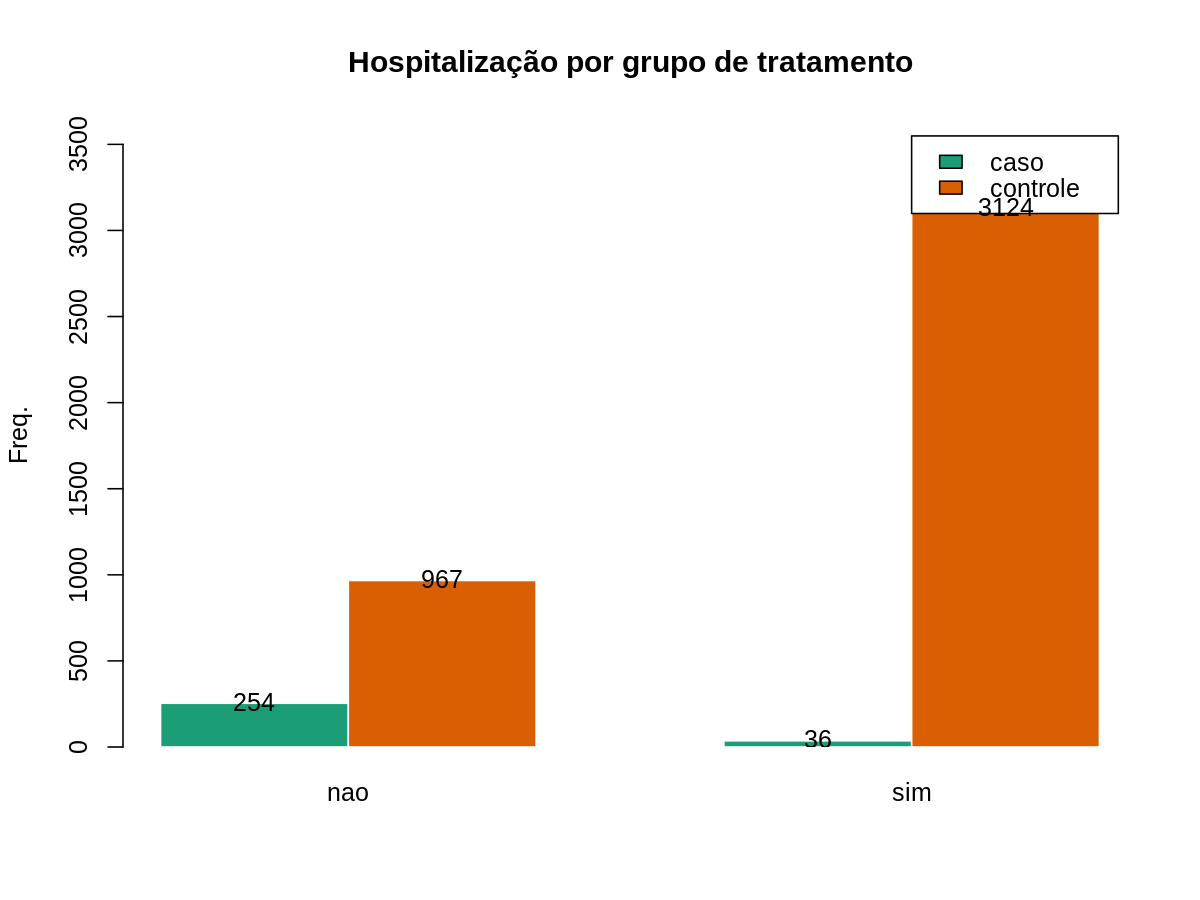

In [474]:
# Gráfico de barra por grupo de tratamento das frequências absolutas das
# categorias da variável Alcool
# Adicione uma linha horizontal com rótulo que corresponde a média geral da variável Alcool
# Salve o gráfico no formato 'png' com dimensões de 800x600 px

# Abre o arquivo
# pdf("hospBar_base.pdf", width=8, height=6)
# png("hospBar_base.png", width=800, height=600)

# Define área e resolução de saída da plotagem do gráfico
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 150)

# Gráfico de barra com pacote GRAPHICS

# https://r-graph-gallery.com/38-rcolorbrewers-palettes.html
pacman::p_load('RColorBrewer')
colors <- brewer.pal(n = length(tabH), name = "Dark2")

# https://htmlcolorcodes.com/color-chart/
# colors <- c('#5499c7','#45b39d','#a569bd','#dc7633')

bp <- barplot(
    t(alcoolABS),
    ylim = c(0, max(alcoolABS)+500),
    beside = T,
    main = 'Hospitalização por grupo de tratamento',
    ylab = 'Freq.',
    col = colors[1:2],
    border = '#FFFFFF',
    legend = T
)
text(x = bp, y = t(alcoolABS) + 10, labels = t(alcoolABS))

# Fecha o arquivo
# dev.off()

Aqui temos dois subestratos da variável Alcool, onde podemos perceber que dentro do grupo controle, o consumo de álcool foi bastante elevado druante a gravidez, enquanto no grupo caso, o consumo foi bastante limitado.


In [475]:
# Gráfico de pizza por grupo de tratamento das frequências relativas (porcentagem)
# das categorias da variável
# Salve o gráfico no formato 'png' com dimensões de 600x600 px

pieplotmodel(IHPD,'controle','ALCOOL','Usuárias de bebida alcoolica durante gravidez para o grupo CONTROLE')
pieplotmodel(IHPD,'caso','ALCOOL','Usuárias de bebida alcoolica durante gravidez para o grupo CASO')

function (which = dev.cur()) 
{
    if (which == 1) 
        stop("cannot shut down device 1 (the null device)")
    .External(C_devoff, as.integer(which))
    dev.cur()
}
<bytecode: 0x55e5fb8e9508>
<environment: namespace:grDevices>

function (which = dev.cur()) 
{
    if (which == 1) 
        stop("cannot shut down device 1 (the null device)")
    .External(C_devoff, as.integer(which))
    dev.cur()
}
<bytecode: 0x55e5fb8e9508>
<environment: namespace:grDevices>

Aqui temos dois gráficos de pizza que representam a porcentagem de mães usuárias de bebidas alcoolicas durante a gravidez. Separamos nos dois grupos de tratamento.

Podemos perceber que dentro do grupo caso, o número de mães usuárias foi bem menor, apenas 12,41%. Enquanto isso no grupo controle esse número sobe para 73,36%

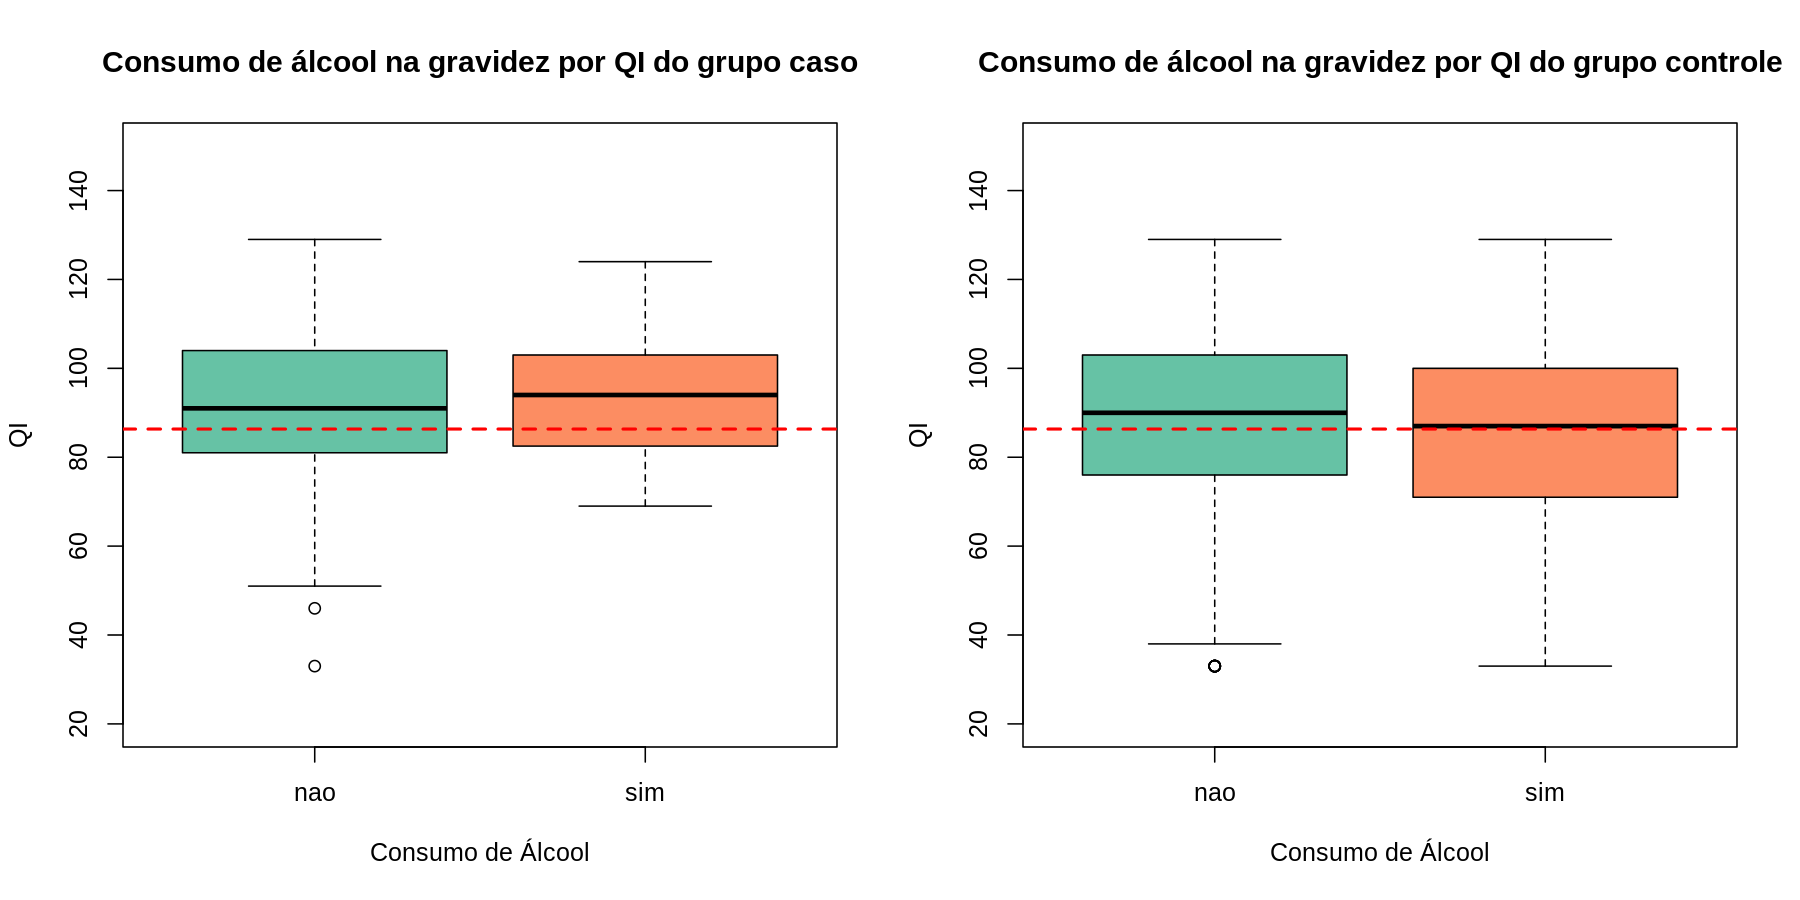

In [476]:
# Diagrama de caixa por grupo de tratamento das frequências absolutas das
# categorias da variável.
# Adicione duas linhas horizontais com rótulos que correspondem a média da variável
# nos grupos caso e controle
# Salve o gráfico no formato 'png' com dimensões de 800x600 px

boxplotmodel(IHPD,'ALCOOL','Consumo de álcool na gravidez por QI do grupo','Consumo de Álcool')


Aqui temos dois gráficos do tipo boxplot, um referenciando o grupo caso e o outro o grupo controle.

No grupo caso, temos que a média geral de QI tende a ser bastante próximo dos valores centrais para usuárias ou não de bebida alcoolica durante a gravidez.

Dentro do grupo controle, o 'range' dos dados é maior porém segue o padrão do grupo caso, valores muito próximos da média geral

In [477]:
# Caso existam, defina e analise os outliers presentes em cada categoria da variável.



cat('\n\n-> Define o intervalo interquartil da variável contínua\n\n')
AlcoolSim <- subset(IHPD, ALCOOL=='sim')
summary(AlcoolSim$QI)

cat('\n\n-> Define os quartis de indicadores de desempenho\n\n')
qiQT = quantile(AlcoolSim$QI)
qiQT

cat('\n\n-> Define o valor máximo do whiskers\n\n')
wskMIN = qiQT[[2]] - 1.5*IQR(AlcoolSim$QI)
wskMIN

cat('\n\n-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)\n\n')
outA = subset(AlcoolSim, QI < wskMIN)
outA[order(outA$QI, decreasing = TRUE),]


cat('\n\n\n---------------------------------------------------------------------------------\n\n\n')


cat('\n\n-> Define o intervalo interquartil da variável contínua\n\n')
AlcoolNao <- subset(IHPD, ALCOOL=='nao')
summary(AlcoolNao$QI)

cat('\n\n-> Define os quartis de indicadores de desempenho\n\n')
qiQT = quantile(AlcoolNao$QI)
qiQT

cat('\n\n-> Define o valor máximo do whiskers\n\n')
wskMIN = qiQT[[2]] - 1.5*IQR(AlcoolNao$QI)
wskMIN

cat('\n\n-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)\n\n')
outB = subset(AlcoolNao, QI < wskMIN)
outB[order(outA$QI, decreasing = TRUE),]


cat('\n\n\n----------------------------------------------------------------------------------\n\n\n')






-> Define o intervalo interquartil da variável contínua



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   72.00   87.00   85.15  100.00  129.00 



-> Define os quartis de indicadores de desempenho



0%  25%  50%  75% 100% 
  33   72   87  100  129



-> Define o valor máximo do whiskers



[1] 30



-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)



IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>





---------------------------------------------------------------------------------




-> Define o intervalo interquartil da variável contínua



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   33.0    78.0    90.0    89.4   103.0   129.0 



-> Define os quartis de indicadores de desempenho



0%  25%  50%  75% 100% 
  33   78   90  103  129



-> Define o valor máximo do whiskers



[1] 40.5



-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)



IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>





----------------------------------------------------------------------------------




Através da análise por todos os extratos podemos ver que não há mães outliers. E os dados são bem distribuídos, mesmo que dispersos, eles seguem um padrão centralizado.



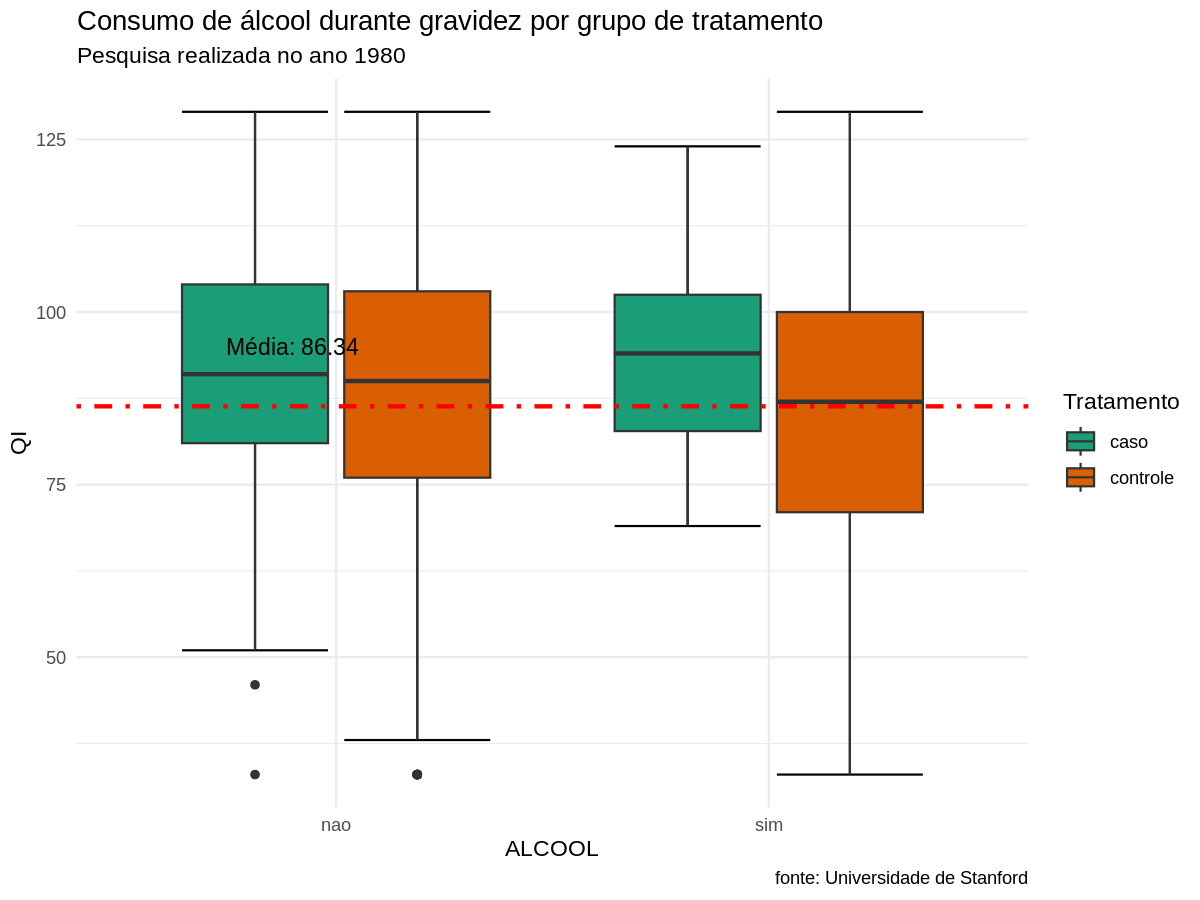

In [380]:
# Histograma de frequência por grupo de tratamento de todas as categorias da variável
# Adicione duas linhas verticais com rótulos que correspondem a média da variável
# nos grupos caso e controle

# Define área e resolução de saída da plotagem do gráfico
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 150)

bx1 <- ggplot(data = IHPD, mapping = aes(x=ALCOOL, y=QI, fill=TRT)) +
        stat_boxplot(geom = "errorbar") +
        geom_boxplot() +
        scale_fill_brewer(palette="Dark2") +
        geom_hline(
            aes(yintercept=mean(QI)),
            lty=4,
            lwd=1,
            color='red'
        ) +
        annotate(
            "text",
            x = .9,
            y = mean(IHPD$QI)+5,
            label = paste('Média:',round(mean(IHPD$QI),2)),
            vjust = -1,
            angle = 0
        ) +
        labs(
            xlab = '',
            fill = 'Tratamento',
            title = 'Consumo de álcool durante gravidez por grupo de tratamento',
            subtitle = 'Pesquisa realizada no ano 1980',
            caption = 'fonte: Universidade de Stanford'
        ) +
        theme_minimal()

ggsave(
    filename = '/content/hospBx.pdf',
    width = 16,
    height = 11,
    units = 'cm',
    bg = 'transparent'
)

bx1

Aqui temos mais um gráfico de box plot, visto que o histograma pede variáveis númericas, então optamos pelo boxplot.

Para o extrato das mães que não consumiram álcool, não parece que a média do QI se distancie o suficiente da média dos dois tipos de tratamento. No extrato das mães que consumiram podemos ver uma média menor principalmente dentro do grupo controle, porém nada muito expressivo, ou forte o suficiente para inferir alguma coisa.



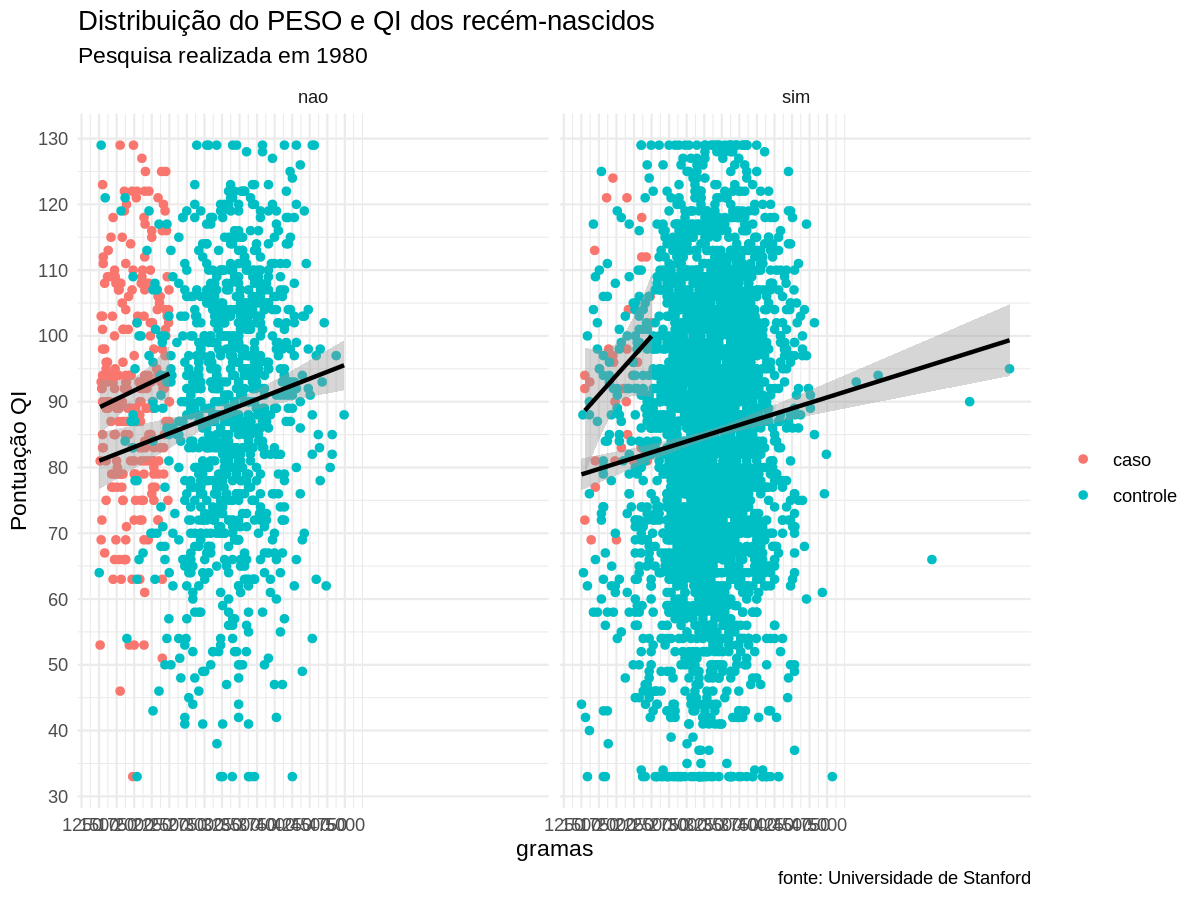

In [362]:
# Gráfico de dispersão por grupo de tratamento entre PESO e QI de todas as
# categorias da variável.
# Adicione uma linha de regressão linear com intervalo de confianca de 95% por
# grupo de tratamento

scatterplotmodel(IHPD,"ALCOOL")


Ambos os extratos se comportam de forma parecida, são inclinadas positivamente, significando quanto maior peso, mais chance da criança ter uma pontuação maior de QI. Porém devido a forma como os gráficos estão dispersos, esta simples regressão linear não seria o suficiente para inferir alguma coisa.


##### C2. Dataset balanceado

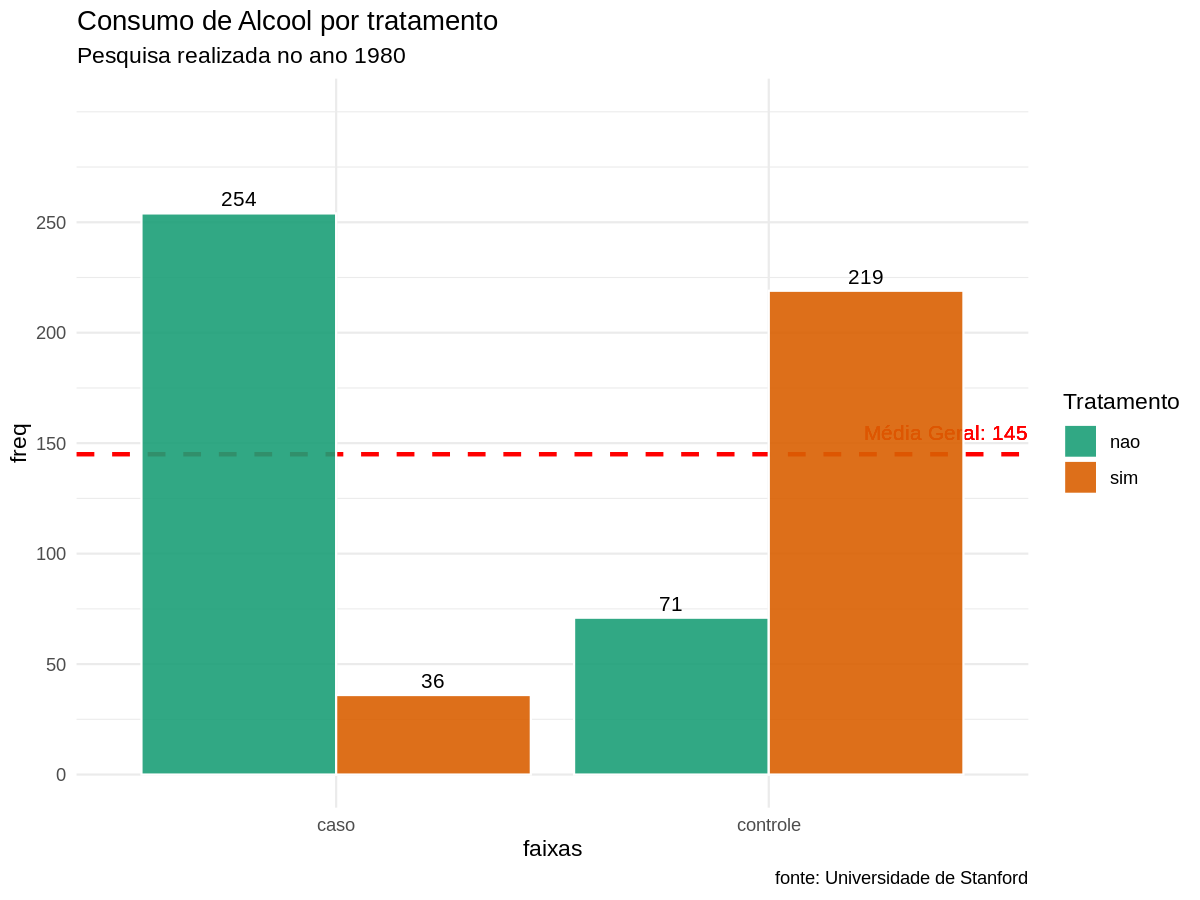

In [279]:
# Gráfico de barra por grupo de tratamento das frequências absolutas das
# categorias da variável
# Adicione uma linha horizontal com rótulo que corresponde a média geral da variável
# Salve o gráfico no formato 'png' com dimensões de 800x600 px
barplotmodel(t(alcoolABSbal),"Tratamento","Consumo de Alcool por tratamento")

No substrato balanceado podemos ver que os valores tendem a ser mais próximos, mas ainda sim, dentro do grupo controle o consumo de álcool foi muito superior, enquanto no grupo caso, o consumo foi reduzido.

NULL

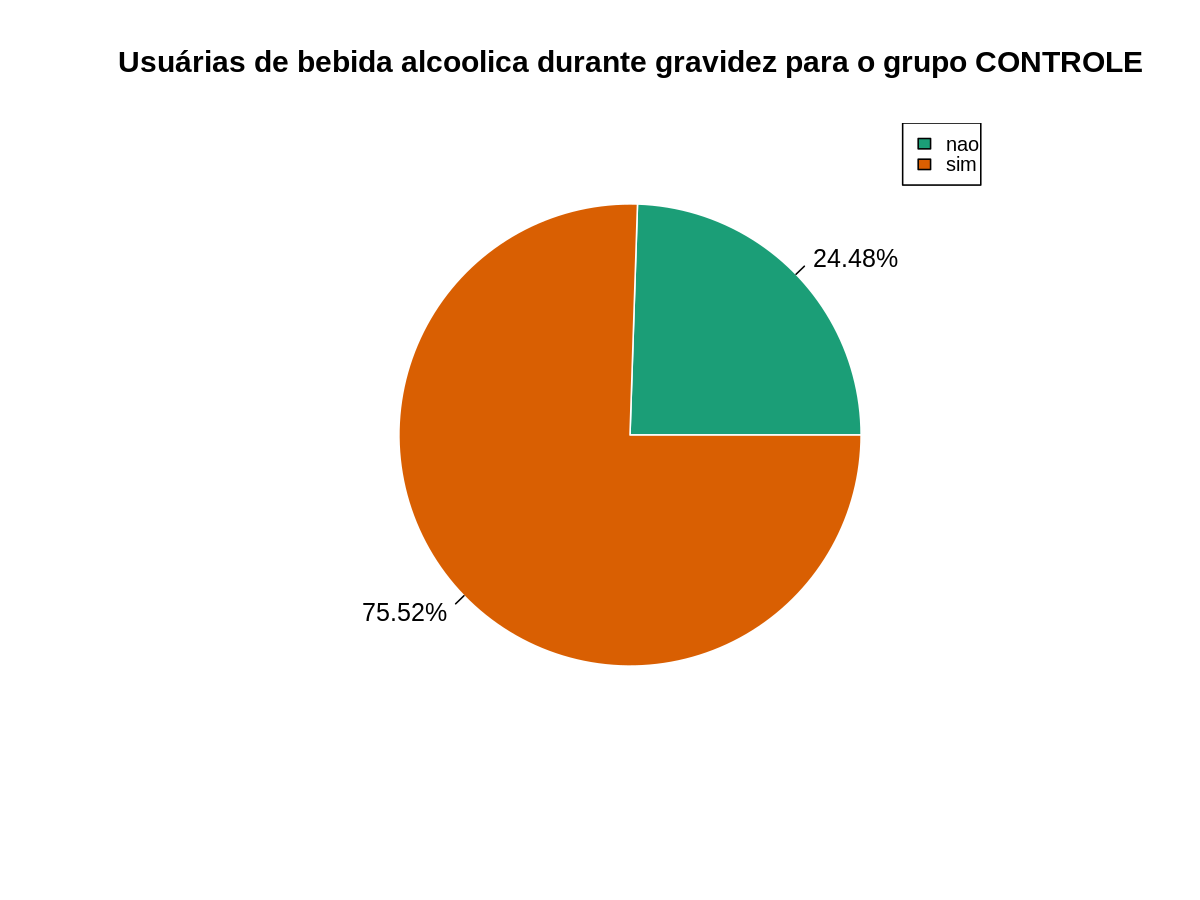

NULL

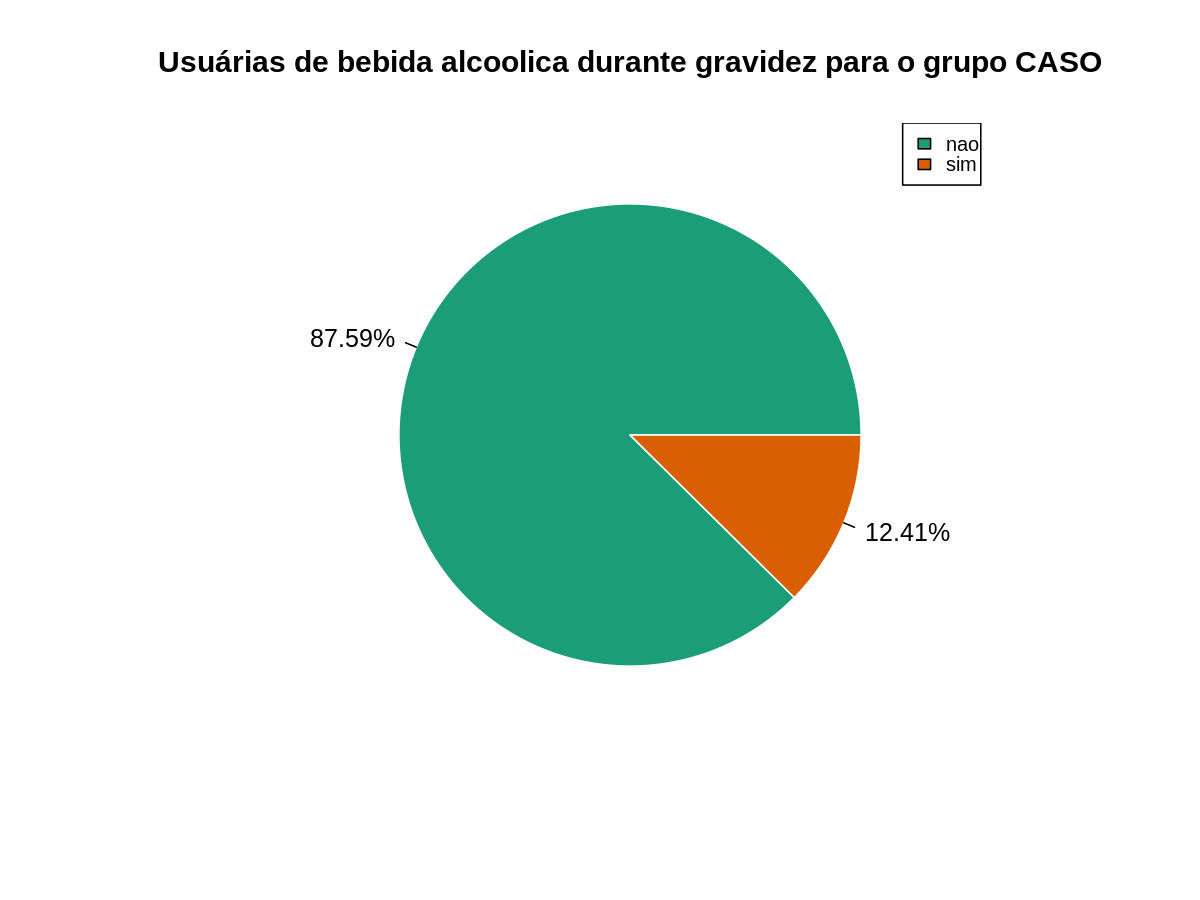

In [325]:
# Gráfico de pizza por grupo de tratamento das frequências relativas (porcentagem)
# das categorias da variável
# Salve o gráfico no formato 'png' com dimensões de 600x600 px

pieplotmodel(IHPD_bal,'controle','ALCOOL','Usuárias de bebida alcoolica durante gravidez para o grupo CONTROLE')
pieplotmodel(IHPD_bal,'caso','ALCOOL','Usuárias de bebida alcoolica durante gravidez para o grupo CASO')

Repetindo um pouco a análise do gráfico passado, contudo em números relativos, podemos ver a porcentagem que no grupo caso o consumo de bebida alcoolica é bem pequeno se comparado ao grupo controle.

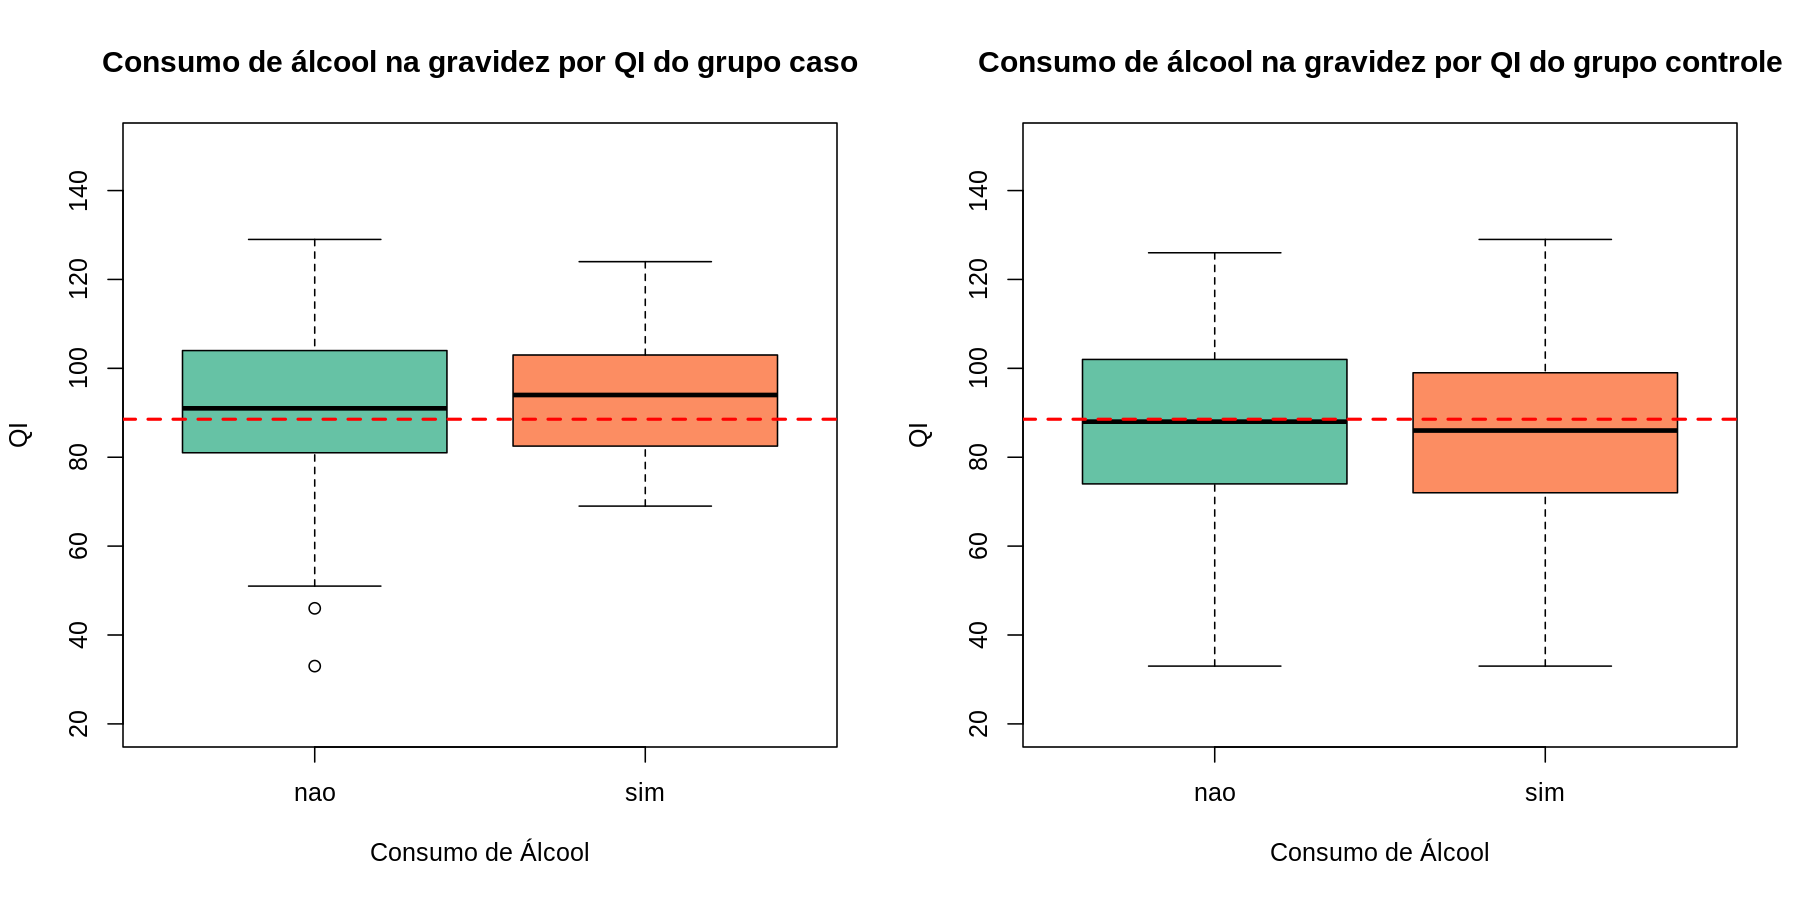

In [419]:
# Diagrama de caixa por grupo de tratamento das frequências absolutas das
# categorias da variável.
# Adicione duas linhas horizontais com rótulos que correspondem a média da variável
# nos grupos caso e controle
# Salve o gráfico no formato 'png' com dimensões de 800x600 px

boxplotmodel(IHPD_bal,'ALCOOL','Consumo de álcool na gravidez por QI do grupo','Consumo de Álcool')


No Dataframe balanceado temos valores ainda mais próximos que anteriormente, a média geral é muito próximo dos valores centrais, sendo que no grupo caso, a média de QI tende a ser levemente superior que a media geral, enquanto no grupo controle tende a ser um pouco pior. Mas a diferença é pequena demais para inferir algo com propriedade.

In [389]:
# Caso existam, defina e analise os outliers presentes em cada categoria da variável.

cat('\n\n-> Define o intervalo interquartil da variável contínua\n\n')
AlcoolSim <- subset(IHPD_bal, ALCOOL=='sim')
summary(AlcoolSim$QI)

cat('\n\n-> Define os quartis de indicadores de desempenho\n\n')
qiQT = quantile(AlcoolSim$QI)
qiQT

cat('\n\n-> Define o valor máximo do whiskers\n\n')
wskMIN = qiQT[[2]] - 1.5*IQR(AlcoolSim$QI)
wskMIN

cat('\n\n-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)\n\n')
outA = subset(AlcoolSim, QI < wskMIN)
outA[order(outA$QI, decreasing = TRUE),]


cat('\n\n\n---------------------------------------------------------------------------------\n\n\n')


cat('\n\n-> Define o intervalo interquartil da variável contínua\n\n')
AlcoolNao <- subset(IHPD_bal, ALCOOL=='nao')
summary(AlcoolNao$QI)

cat('\n\n-> Define os quartis de indicadores de desempenho\n\n')
qiQT = quantile(AlcoolNao$QI)
qiQT

cat('\n\n-> Define o valor máximo do whiskers\n\n')
wskMIN = qiQT[[2]] - 1.5*IQR(AlcoolNao$QI)
wskMIN

cat('\n\n-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)\n\n')
outB = subset(AlcoolNao, QI < wskMIN)
outB[order(outA$QI, decreasing = TRUE),]


cat('\n\n\n----------------------------------------------------------------------------------\n\n\n')



-> Define o intervalo interquartil da variável contínua



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   33.0    73.0    87.0    86.0    99.5   129.0 



-> Define os quartis de indicadores de desempenho



0%   25%   50%   75%  100% 
 33.0  73.0  87.0  99.5 129.0



-> Define o valor máximo do whiskers



[1] 33.25



-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)



,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPREMAT
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>
388,25,negra,medio,sim,sim,nao,sim,masculino,nao,4309,1,3,14220,controle,33,ausente
405,24,hispanica,medio_incompleto,nao,sim,nao,sim,masculino,nao,2835,1,2,-7158,controle,33,ausente
502,26,branca,superior_incompleto,sim,sim,nao,sim,masculino,nao,3855,1,2,35150,controle,33,ausente
512,23,negra,medio,sim,sim,sim,sim,feminino,sim,3260,-2,3,-23747,controle,33,ausente





---------------------------------------------------------------------------------




-> Define o intervalo interquartil da variável contínua



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   80.00   90.00   90.55  103.00  129.00 



-> Define os quartis de indicadores de desempenho



0%  25%  50%  75% 100% 
  33   80   90  103  129



-> Define o valor máximo do whiskers



[1] 45.5



-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)



,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPREMAT
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>
272,25,negra,medio_incompleto,sim,sim,sim,nao,masculino,sim,1980,5,6,12500,caso,33,moderada
517,24,negra,medio,sim,sim,nao,nao,masculino,nao,3657,1,4,42000,controle,33,ausente
523,23,branca,medio_incompleto,nao,sim,sim,nao,feminino,nao,2778,0,3,21440,controle,45,ausente
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA





----------------------------------------------------------------------------------




Com a redução e balanceamento do dataframe, os gráficos ficaram um pouco mais pulverizados, e agora podemos enxergar valores de outliers , 4 para mães que consumiram álcool e 3 para grupo de mães que não consumiram álcool durante a gravidez. Todos esses outliers estão dentro da categorias de ausente ou prematuridade moderada.

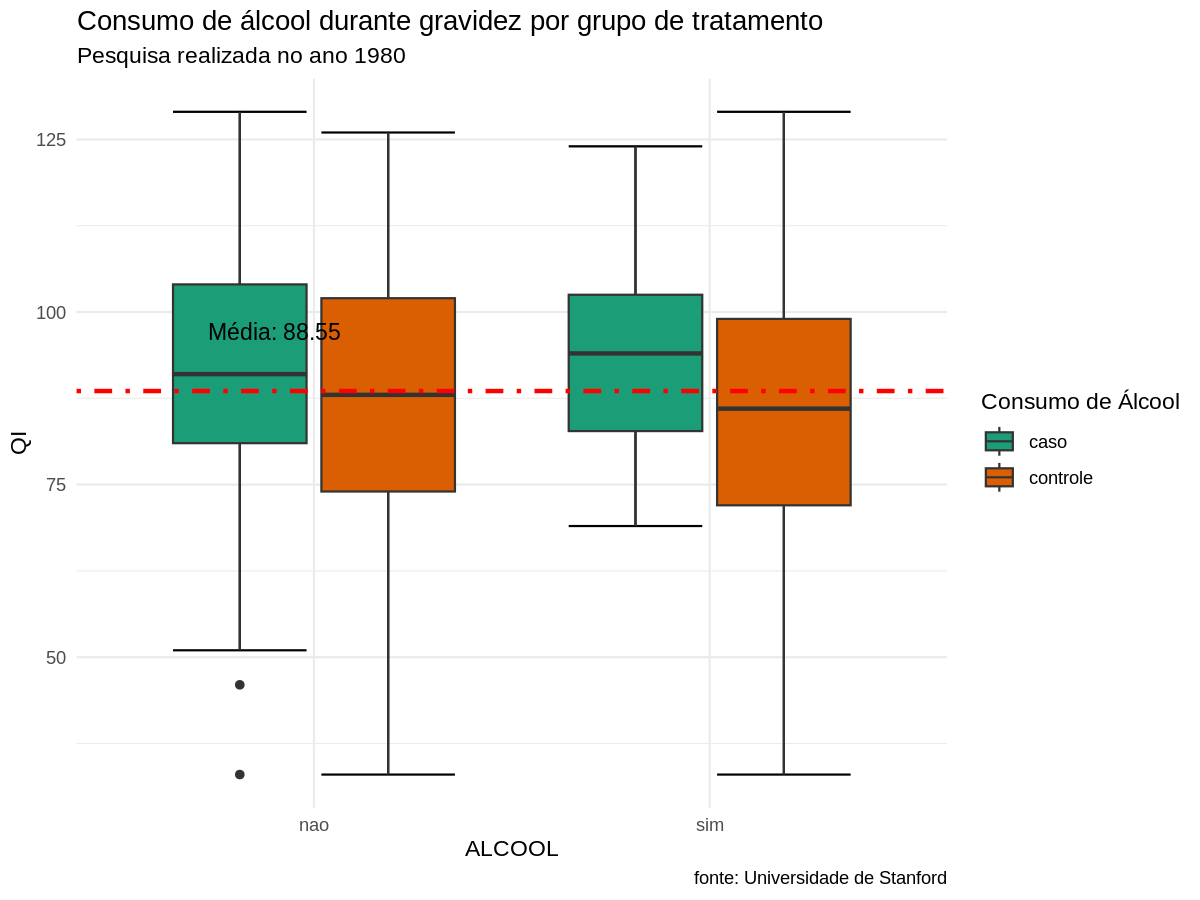

In [283]:
# Histograma de frequência por grupo de tratamento de todas as categorias da variável
# Adicione duas linhas verticais com rótulos que correspondem a média da variável
# nos grupos caso e controle

# Define área e resolução de saída da plotagem do gráfico
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 150)

bx1 <- ggplot(data = IHPD_bal, mapping = aes(x=ALCOOL, y=QI, fill=TRT)) +
        stat_boxplot(geom = "errorbar") +
        geom_boxplot() +
        scale_fill_brewer(palette="Dark2") +
        geom_hline(
            aes(yintercept=mean(QI)),
            lty=4,
            lwd=1,
            color='red'
        ) +
        annotate(
            "text",
            x = .9,
            y = mean(IHPD_bal$QI)+5,
            label = paste('Média:',round(mean(IHPD_bal$QI),2)),
            vjust = -1,
            angle = 0
        ) +
        labs(
            xlab = '',
            fill = 'Consumo de Álcool',
            title = 'Consumo de álcool durante gravidez por grupo de tratamento',
            subtitle = 'Pesquisa realizada no ano 1980',
            caption = 'fonte: Universidade de Stanford'
        ) +
        theme_minimal()

ggsave(
    filename = '/content/hospBx.pdf',
    width = 16,
    height = 11,
    units = 'cm',
    bg = 'transparent'
)

bx1




Podemos perceber aqui um aumento das médias de QI dentro do grupo caso se comparado ao grupo controle que permanece na média ou abaixo, tanto para o subextrato das mães que consumiram álcool durante a gravidez ou não.


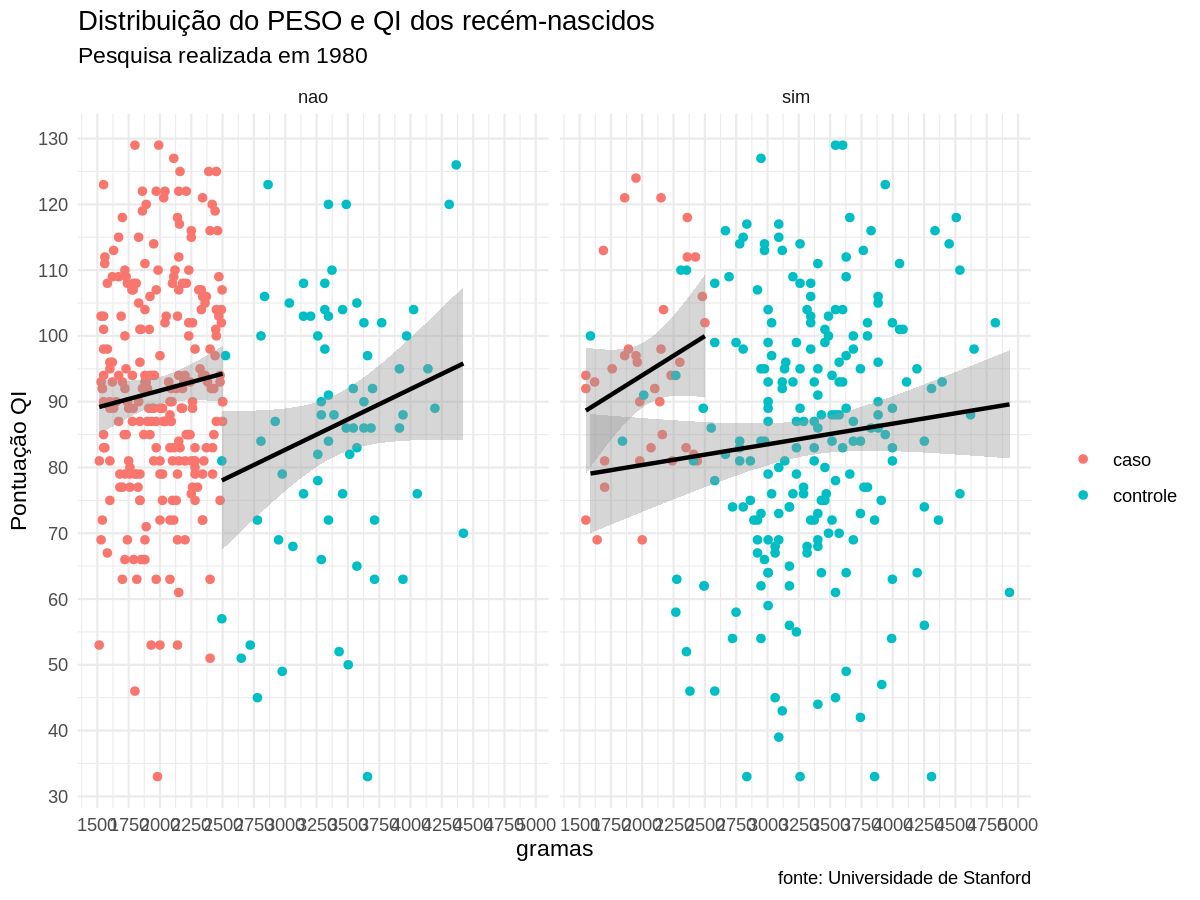

In [363]:
# Gráfico de dispersão por grupo de tratamento entre PESO e QI de todas as
# categorias da variável.
# Adicione uma linha de regressão linear com intervalo de confianca de 95% por
# grupo de tratamento

scatterplotmodel(IHPD_bal,"ALCOOL")


O grupo caso possui casos de prematuridade mais severos que o grupo controle, porém o gráfico para o subextrato 'sim' possui muito mais pulverização dos dados, que o gráfico do 'não'. No geral isso não pode nos dar nenhuma informação relevante.

No mais, a tendencia positiva entre QI e PESO permanece, mesmo que fraca e meio inadequada.


### 8.1.5 Variável `PREMAT`

##### A. Categorização (se necessário)

In [285]:
# Definição da variável
var <- 'PREMAT'

In [286]:
# Categorização da variável
PREMATCAT <- makeFactor(
    IHPD,
    'PREMAT',
    c(-Inf,1,6,9,Inf),
    c('ausente','moderada','alta','extrema')
)
IHPD$FPREMAT <- PREMATCAT
head(IHPD)

,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPREMAT
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>
1,33,branca,superior,sim,sim,nao,nao,masculino,nao,1559,10,31,42500,caso,111,extrema
2,22,negra,medio_incompleto,nao,sim,nao,sim,masculino,nao,2240,3,4,5000,caso,81,moderada
3,13,negra,medio_incompleto,nao,sim,nao,nao,masculino,sim,1900,6,9,12500,caso,92,moderada
4,25,negra,superior,sim,sim,nao,nao,masculino,sim,1550,8,50,42500,caso,103,alta
5,19,negra,medio_incompleto,nao,sim,sim,nao,masculino,nao,2270,5,4,5000,caso,81,moderada
6,19,negra,medio,sim,sim,sim,sim,feminino,sim,1550,4,13,12500,caso,94,moderada


In [287]:
# Categorização da variável p/ Dataframe Balanceado
PREMATCAT <- makeFactor(
    IHPD_bal,
    'PREMAT',
    c(-Inf,1,6,9,Inf),
    c('ausente','moderada','alta','extrema')
)
IHPD_bal$FPREMAT <- PREMATCAT
head(IHPD_bal)

,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPREMAT
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>
1,21,negra,medio_incompleto,nao,sim,nao,nao,masculino,nao,2420,3,3,17500,caso,79,moderada
2,16,negra,medio_incompleto,nao,sim,nao,nao,masculino,sim,2080,7,5,8750,caso,88,alta
3,28,branca,superior_incompleto,sim,sim,nao,nao,feminino,nao,2470,5,3,22500,caso,103,moderada
4,16,negra,medio_incompleto,nao,sim,nao,nao,masculino,sim,2090,6,7,8750,caso,92,moderada
5,18,branca,medio_incompleto,nao,sim,nao,nao,masculino,nao,2020,8,24,12500,caso,89,alta
6,25,branca,medio_incompleto,sim,sim,sim,nao,masculino,nao,2490,6,7,81632,caso,104,moderada


In [288]:
levels(IHPD$FPREMAT)

[1] "ausente"  "moderada" "alta"     "extrema"

In [289]:
printStrata(IHPD,'FPREMAT')


Estratos de ETNIA :
          
           branca hispanica negra
  ausente    1606       699   903
  moderada    472       169   338
  alta         90        28    50
  extrema       8         4    14

Estratos de EDU :
          
           medio medio_incompleto superior superior_incompleto
  ausente   1357              996      253                 602
  moderada   397              292       95                 195
  alta        61               57       15                  35
  extrema      5               13        3                   5

Estratos de TRAB :
          
            nao  sim
  ausente  1238 1970
  moderada  354  625
  alta       67  101
  extrema    11   15

Estratos de PRENATAL :
          
            nao  sim
  ausente    41 3167
  moderada   17  962
  alta        6  162
  extrema     1   25

Estratos de CIGARRO :
          
            nao  sim
  ausente  2152 1056
  moderada  640  339
  alta      113   55
  extrema    24    2

Estratos de ALCOOL :
          
     

#### B. Análise numérica

##### A1. Dataset desbalanceado

In [290]:
# Análise de todos os estratos da variável
cat("\n\n ----------------- AUSENTE ---------------------\n\n")
printStrata(subset(IHPD,FPREMAT=='ausente'),'TRT')
cat("\n\n ----------------- MODERADA ---------------------\n\n")
printStrata(subset(IHPD,FPREMAT=='moderada'),'TRT')
cat("\n\n ----------------- ALTA ---------------------\n\n")
printStrata(subset(IHPD,FPREMAT=='alta'),'TRT')
cat("\n\n ----------------- EXTREMA ---------------------\n\n")
printStrata(subset(IHPD,FPREMAT=='extrema'),'TRT')



 ----------------- AUSENTE ---------------------


Estratos de ETNIA :
          
           branca hispanica negra
  caso          0         0     0
  controle   1606       699   903

Estratos de EDU :
          
           medio medio_incompleto superior superior_incompleto
  caso         0                0        0                   0
  controle  1357              996      253                 602

Estratos de TRAB :
          
            nao  sim
  caso        0    0
  controle 1238 1970

Estratos de PRENATAL :
          
            nao  sim
  caso        0    0
  controle   41 3167

Estratos de CIGARRO :
          
            nao  sim
  caso        0    0
  controle 2152 1056

Estratos de ALCOOL :
          
            nao  sim
  caso        0    0
  controle  777 2431

Estratos de GENERO :
          
           feminino masculino
  caso            0         0
  controle     1616      1592

Estratos de PRIMOG :
          
            nao  sim
  caso        0    0
  controle 1

In [291]:
# Estatísticas básicas
summary(IHPD[,var])
summary(CTRL[,var])
summary(CASO[,var])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -7.000   1.000   1.000   1.493   2.000  14.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -7.000   1.000   1.000   1.168   1.000  14.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   5.000   6.000   6.072   7.000  11.000 

In [292]:
# Freqência absoluta
prematABS <- table(IHPD$FPREMAT, IHPD$TRT)
prematABS

          
           caso controle
  ausente     0     3208
  moderada  187      792
  alta       86       82
  extrema    17        9

In [293]:
# Frequencia relativa

prematREL <- supertable2(IHPD,'FPREMAT','TRT')
prematREL

          
            caso controle
  ausente   0.00    78.42
  moderada 64.48    19.36
  alta     29.66     2.00
  extrema   5.86     0.22

##### A2. Dataset balanceado

In [294]:
# Análise de todos os estratos da variável
cat("\n\n ----------------- AUSENTE ---------------------\n\n")
printStrata(subset(IHPD_bal,FPREMAT=='ausente'),'TRT')
cat("\n\n ----------------- MODERADA ---------------------\n\n")
printStrata(subset(IHPD_bal,FPREMAT=='moderada'),'TRT')
cat("\n\n ----------------- ALTA ---------------------\n\n")
printStrata(subset(IHPD_bal,FPREMAT=='alta'),'TRT')
cat("\n\n ----------------- EXTREMA ---------------------\n\n")
printStrata(subset(IHPD_bal,FPREMAT=='extrema'),'TRT')



 ----------------- AUSENTE ---------------------


Estratos de ETNIA :
          
           branca hispanica negra
  caso          0         0     0
  controle    114        49    76

Estratos de EDU :
          
           medio medio_incompleto superior superior_incompleto
  caso         0                0        0                   0
  controle    98               72       18                  51

Estratos de TRAB :
          
           nao sim
  caso       0   0
  controle  94 145

Estratos de PRENATAL :
          
           nao sim
  caso       0   0
  controle   3 236

Estratos de CIGARRO :
          
           nao sim
  caso       0   0
  controle 162  77

Estratos de ALCOOL :
          
           nao sim
  caso       0   0
  controle  61 178

Estratos de GENERO :
          
           feminino masculino
  caso            0         0
  controle      109       130

Estratos de PRIMOG :
          
           nao sim
  caso       0   0
  controle 146  93

Estratos de FPREMAT 

In [295]:
# Estatísticas básicas
summary(IHPD_bal[,var])
summary(CTRL_bal[,var])
summary(CASO_bal[,var])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -3.000   1.000   3.000   3.486   6.000  11.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   -3.0     0.0     1.0     0.9     1.0     7.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   5.000   6.000   6.072   7.000  11.000 

In [296]:
# Freqência absoluta
prematABSbal <- table(IHPD_bal$FPREMAT, IHPD_bal$TRT)
prematABSbal

          
           caso controle
  ausente     0      239
  moderada  187       48
  alta       86        3
  extrema    17        0

In [297]:
# Frequencia relativa
prematRELbal <- supertable2(IHPD_bal,'FPREMAT','TRT')
prematRELbal

          
            caso controle
  ausente   0.00    82.41
  moderada 64.48    16.55
  alta     29.66     1.03
  extrema   5.86     0.00

#### C. Análise gráfica

##### C1. Dataset desbalanceado

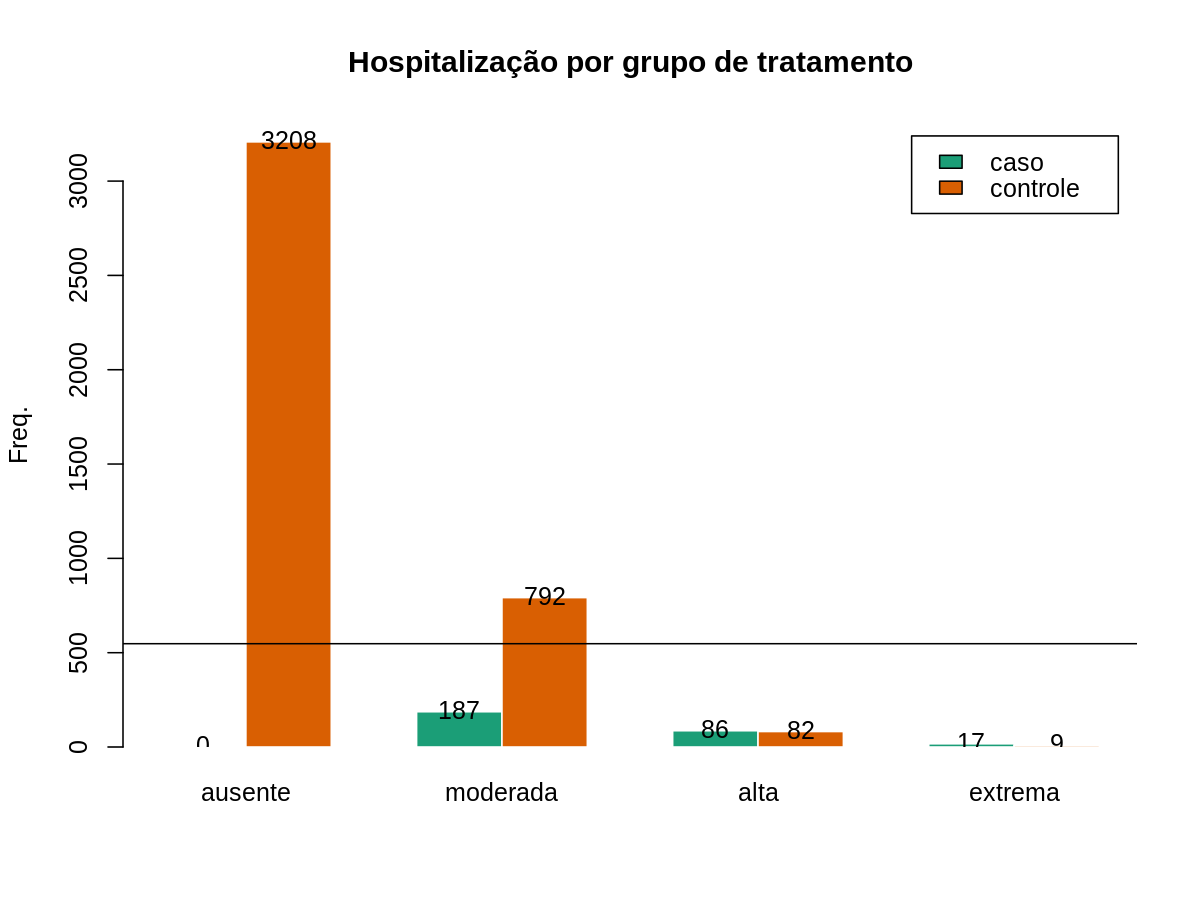

In [397]:
# Gráfico de barra por grupo de tratamento das frequências absolutas das
# categorias da variável
# Adicione uma linha horizontal com rótulo que corresponde a média geral da variável
# Salve o gráfico no formato 'png' com dimensões de 800x600 px

# pdf("hospBar_base.pdf", width=8, height=6)
# png("hospBar_base.png", width=800, height=600)

# Define área e resolução de saída da plotagem do gráfico
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 150)

# Gráfico de barra com pacote GRAPHICS

# https://r-graph-gallery.com/38-rcolorbrewers-palettes.html
pacman::p_load('RColorBrewer')
colors <- brewer.pal(n = length(prematABS), name = "Dark2")

# https://htmlcolorcodes.com/color-chart/
# colors <- c('#5499c7','#45b39d','#a569bd','#dc7633')

bp <- barplot(
    t(prematABS),
    ylim = c(0, max(prematABS)+100),
    beside = T,
    main = 'Hospitalização por grupo de tratamento',
    ylab = 'Freq.',
    col = colors[1:2],
    border = '#FFFFFF',
    legend = T
)
abline(h = mean(prematABS)) # Adiciona a linha de horizontal
text(x = bp, y = t(prematABS) + 10, labels = t(prematABS))

# Fecha o arquivo
# dev.off()

Podemos análisar nesse gráfico que o grupo controle possui quase a totalidade das observações e a grande maioria se categoriza como ausente(ou seja, não há caso de nascimento prematuro) enquanto isso o grupo caso possui número balanceados, porém não há ausentes.

NULL

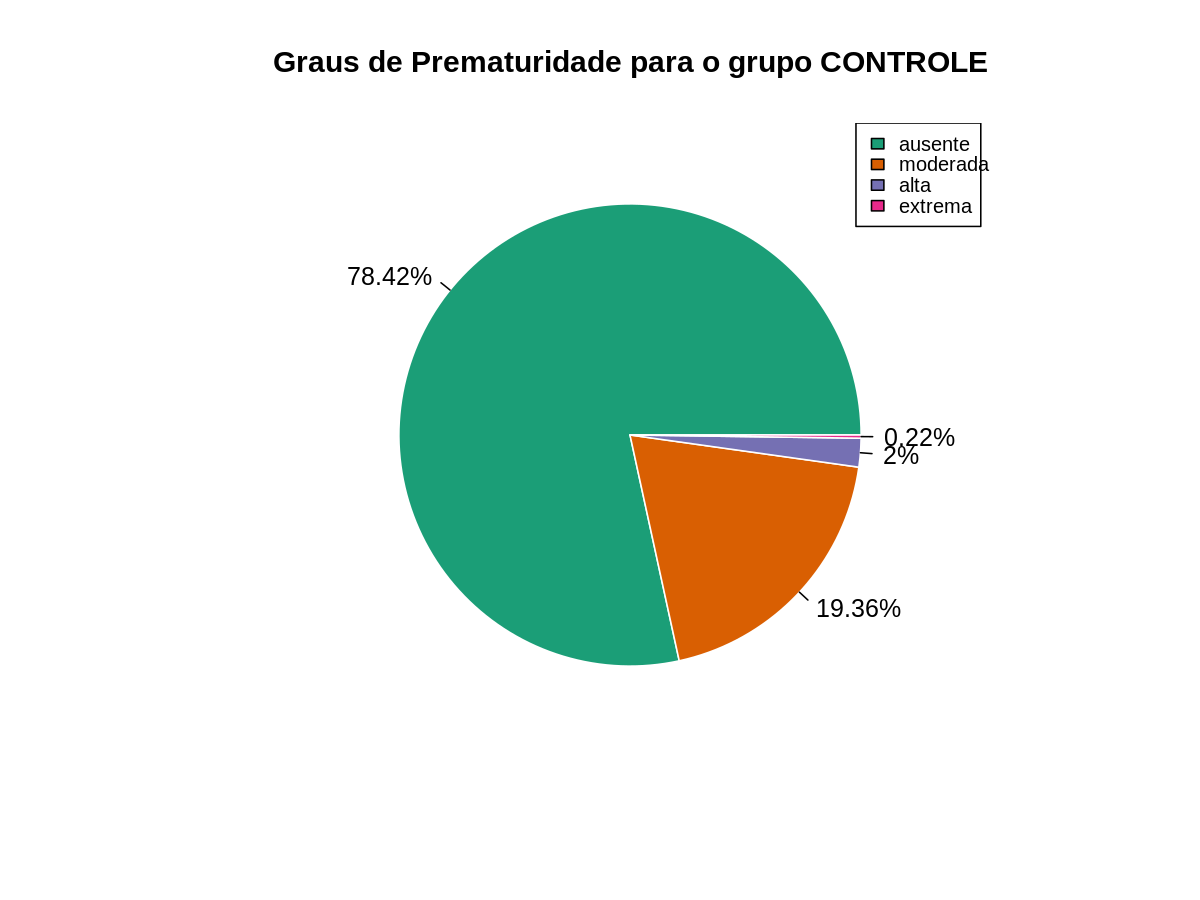

NULL

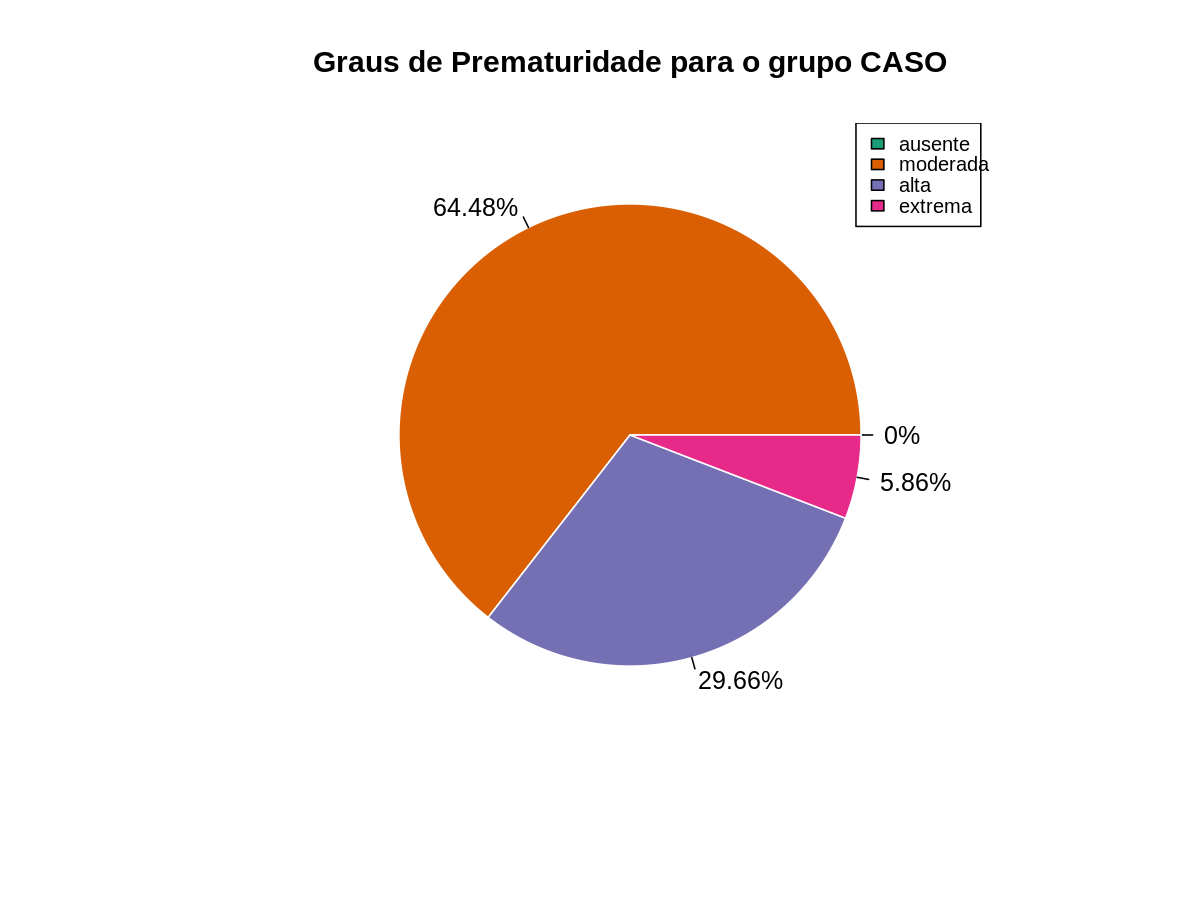

In [364]:
# Gráfico de pizza por grupo de tratamento das frequências relativas (porcentagem)
# das categorias da variável
# Salve o gráfico no formato 'png' com dimensões de 600x600 px


pieplotmodel(IHPD,'controle','FPREMAT','Graus de Prematuridade para o grupo CONTROLE')
pieplotmodel(IHPD,'caso','FPREMAT','Graus de Prematuridade para o grupo CASO')

Analisando primeiro o grupo controle temos que:

Como dito anteriormente, boa parte consiste de casos ausentes de prematuridade, um valor alto de casos moderados e poucos casos de alta ou extrema.

Analisando o grupo caso temos que:

O número de prematuridade moderada, dominam o gráfico, em seguida alta e por fim a extrema. Isso é resultado da forma como o grupo caso foi formado, onde apenas crianças que nasceram prematuras foram aceitas.

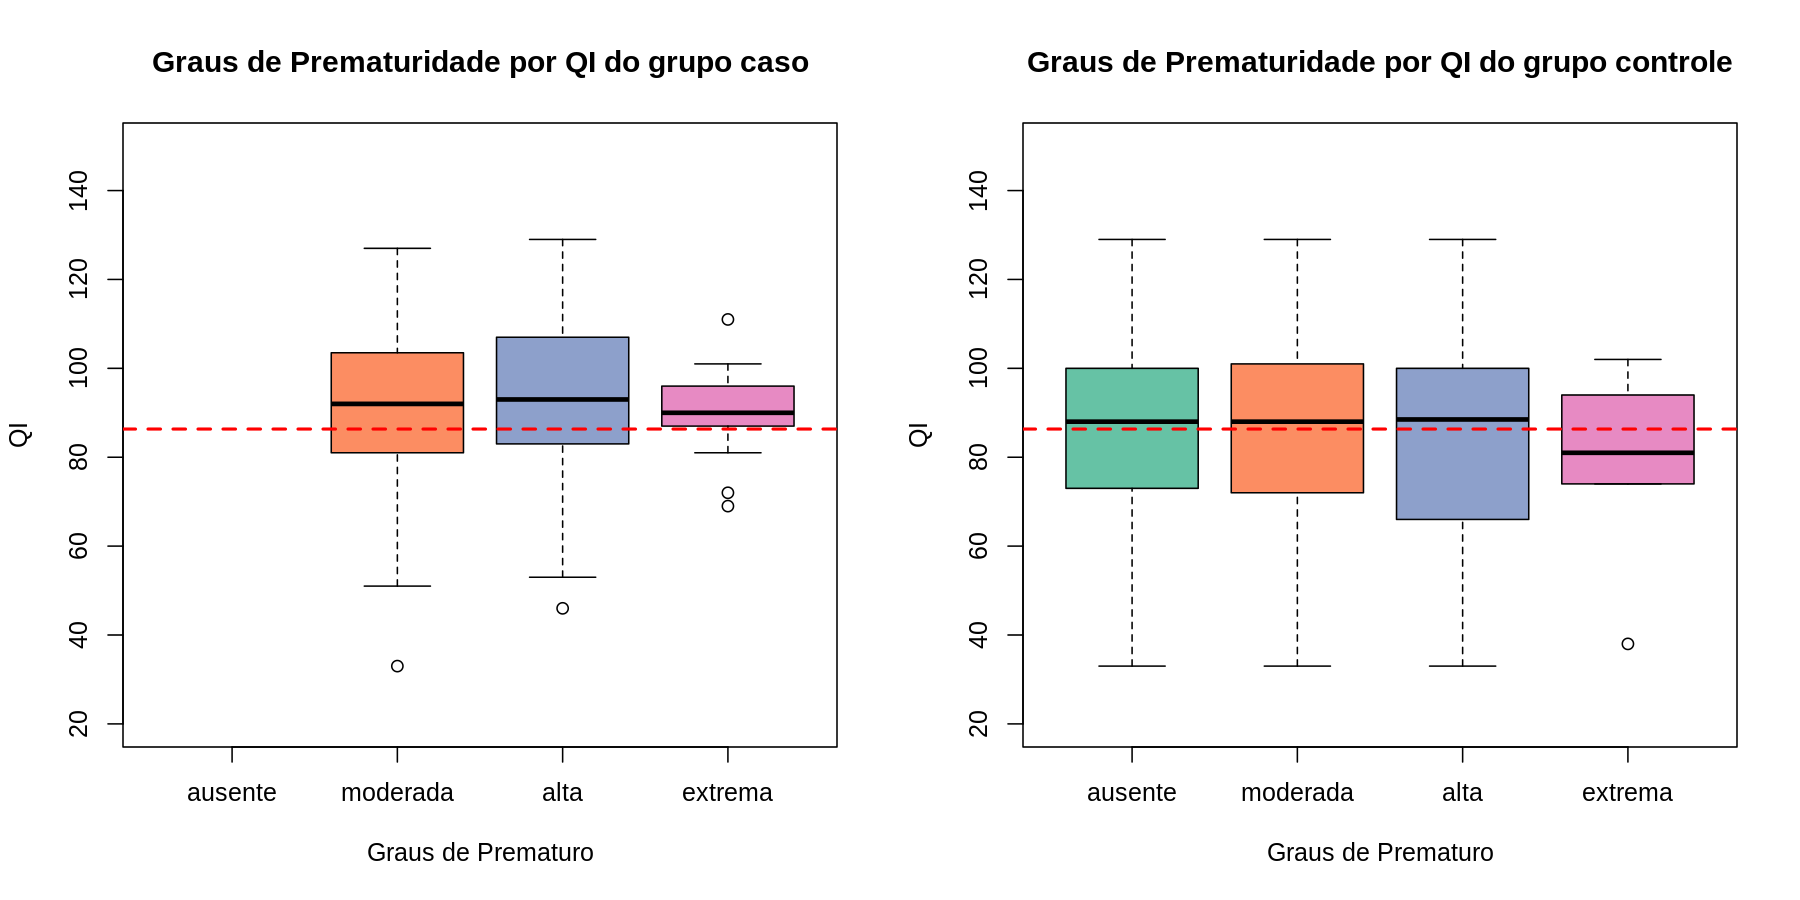

In [418]:
# Diagrama de caixa por grupo de tratamento das frequências absolutas das
# categorias da variável.
# Adicione duas linhas horizontais com rótulos que correspondem a média da variável
# nos grupos caso e controle
# Salve o gráfico no formato 'png' com dimensões de 800x600 px

boxplotmodel(IHPD,'FPREMAT','Graus de Prematuridade por QI do grupo','Graus de Prematuro')


Aqui podemos ver como grupo caso possui uma média superior e uma distribuição menor, muito próximo a média geral de QI. Enquanto isso o grupo controle possui uma distribuição maior de valores, mas possuem médias próximas a média geral do QI.

In [396]:
# Caso existam, defina e analise os outliers presentes em cada categoria da variável.

cat('\n\n-> Define o intervalo interquartil da variável contínua\n\n')
prematAusente <- subset(IHPD, FPREMAT=='ausente')
summary(prematAusente$QI)

cat('\n\n-> Define os quartis de indicadores de desempenho\n\n')
qiQT = quantile(prematAusente$QI)
qiQT

cat('\n\n-> Define o valor máximo do whiskers\n\n')
wskMIN = qiQT[[2]] - 1.5*IQR(prematAusente$QI)
wskMIN

cat('\n\n-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)\n\n')
outA = subset(prematAusente, QI < wskMIN)
outA[order(outA$QI, decreasing = TRUE),]


cat('\n\n\n---------------------------------------------------------------------------------\n\n\n')


cat('\n\n-> Define o intervalo interquartil da variável contínua\n\n')
prematModerada <- subset(IHPD, FPREMAT=='moderada')
summary(prematModerada$QI)

cat('\n\n-> Define os quartis de indicadores de desempenho\n\n')
qiQT = quantile(prematModerada$QI)
qiQT

cat('\n\n-> Define o valor máximo do whiskers\n\n')
wskMIN = qiQT[[2]] - 1.5*IQR(prematModerada$QI)
wskMIN

cat('\n\n-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)\n\n')
outB = subset(prematModerada, QI < wskMIN)
outB[order(outA$QI, decreasing = TRUE),]


cat('\n\n\n----------------------------------------------------------------------------------\n\n\n')

cat('\n\n-> Define o intervalo interquartil da variável contínua\n\n')
prematAlta <- subset(IHPD, FPREMAT=='alta')
summary(prematAlta$QI)

cat('\n\n-> Define os quartis de indicadores de desempenho\n\n')
qiQT = quantile(prematAlta$QI)
qiQT

cat('\n\n-> Define o valor máximo do whiskers\n\n')
wskMIN = qiQT[[2]] - 1.5*IQR(prematAlta$QI)
wskMIN

cat('\n\n-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)\n\n')
outB = subset(prematAlta, QI < wskMIN)
outB[order(outA$QI, decreasing = TRUE),]


cat('\n\n\n----------------------------------------------------------------------------------\n\n\n')

cat('\n\n-> Define o intervalo interquartil da variável contínua\n\n')
prematExtrema <- subset(IHPD, FPREMAT=='extrema')
summary(prematExtrema$QI)

cat('\n\n-> Define os quartis de indicadores de desempenho\n\n')
qiQT = quantile(prematExtrema$QI)
qiQT

cat('\n\n-> Define o valor máximo do whiskers\n\n')
wskMIN = qiQT[[2]] - 1.5*IQR(prematExtrema$QI)
wskMIN

cat('\n\n-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)\n\n')
outB = subset(prematExtrema, QI < wskMIN)
outB[order(outA$QI, decreasing = TRUE),]


cat('\n\n\n----------------------------------------------------------------------------------\n\n\n')



-> Define o intervalo interquartil da variável contínua



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   73.00   88.00   85.94  100.00  129.00 



-> Define os quartis de indicadores de desempenho



0%  25%  50%  75% 100% 
  33   73   88  100  129



-> Define o valor máximo do whiskers



[1] 32.5



-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)



IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPREMAT
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>





---------------------------------------------------------------------------------




-> Define o intervalo interquartil da variável contínua



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   74.00   88.00   87.19  102.00  129.00 



-> Define os quartis de indicadores de desempenho



0%  25%  50%  75% 100% 
  33   74   88  102  129



-> Define o valor máximo do whiskers



[1] 32



-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)



IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPREMAT
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>





----------------------------------------------------------------------------------




-> Define o intervalo interquartil da variável contínua



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   77.00   90.00   88.92  104.00  129.00 



-> Define os quartis de indicadores de desempenho



0%  25%  50%  75% 100% 
  33   77   90  104  129



-> Define o valor máximo do whiskers



[1] 36.5



-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)



IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPREMAT
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>





----------------------------------------------------------------------------------




-> Define o intervalo interquartil da variável contínua



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  38.00   81.00   89.50   86.81   94.75  111.00 



-> Define os quartis de indicadores de desempenho



0%    25%    50%    75%   100% 
 38.00  81.00  89.50  94.75 111.00



-> Define o valor máximo do whiskers



[1] 60.375



-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)



IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPREMAT
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>





----------------------------------------------------------------------------------




A análise de outliers nos mostra que há uma boa distribuição dos dados e nenhum outlier foi detectado



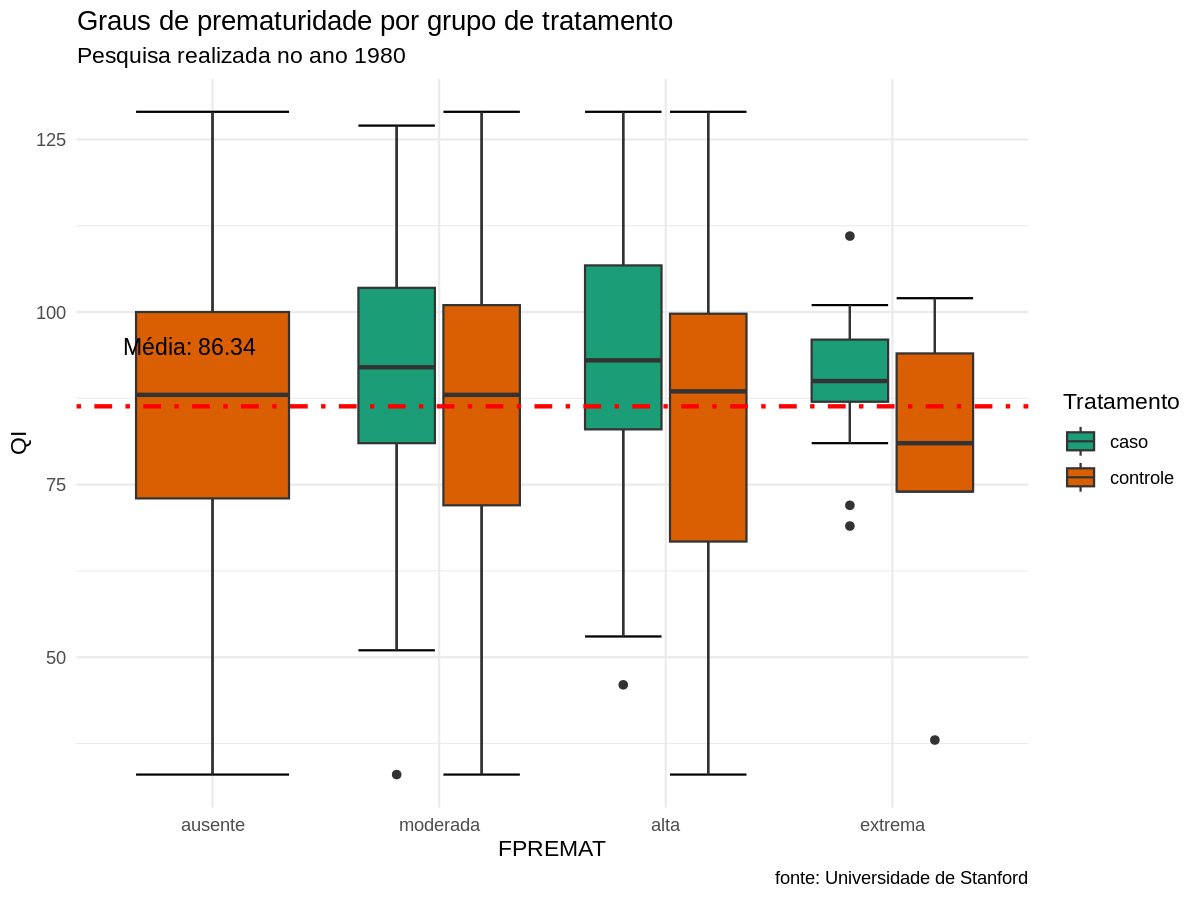

In [312]:
# Histograma de frequência por grupo de tratamento de todas as categorias da variável
# Adicione duas linhas verticais com rótulos que correspondem a média da variável
# nos grupos caso e controle

# Define área e resolução de saída da plotagem do gráfico
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 150)

bx1 <- ggplot(data = IHPD, mapping = aes(x=FPREMAT, y=QI, fill=TRT)) +
        stat_boxplot(geom = "errorbar") +
        geom_boxplot() +
        scale_fill_brewer(palette="Dark2") +
        geom_hline(
            aes(yintercept=mean(QI)),
            lty=4,
            lwd=1,
            color='red'
        ) +
        annotate(
            "text",
            x = .9,
            y = mean(IHPD$QI)+5,
            label = paste('Média:',round(mean(IHPD$QI),2)),
            vjust = -1,
            angle = 0
        ) +
        labs(
            xlab = '',
            fill = 'Tratamento',
            title = 'Graus de prematuridade por grupo de tratamento',
            subtitle = 'Pesquisa realizada no ano 1980',
            caption = 'fonte: Universidade de Stanford'
        ) +
        theme_minimal()

ggsave(
    filename = '/content/hospBx.pdf',
    width = 16,
    height = 11,
    units = 'cm',
    bg = 'transparent'
)

bx1


Esse boxplot reinforça como dentro do grupo caso, conseguem resultados de média de QI superiores ao grupo controle. Mesmo que não muito superiores, em especial no caso de prematuridade extrema, o grupo caso se sobresai de forma muito superior ao grupo controle.


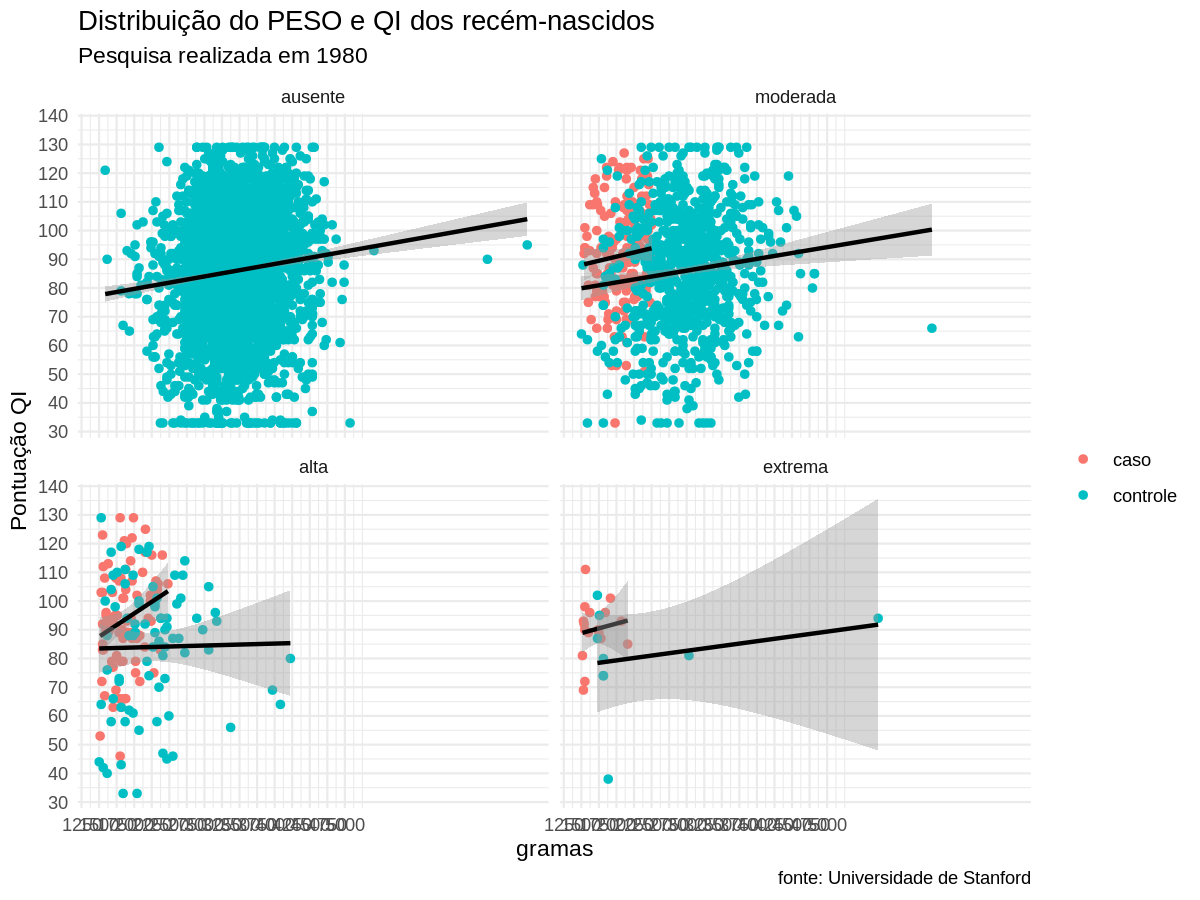

In [365]:
# Gráfico de dispersão por grupo de tratamento entre PESO e QI de todas as
# categorias da variável.
# Adicione uma linha de regressão linear com intervalo de confianca de 95% por
# grupo de tratamento

scatterplotmodel(IHPD,'FPREMAT')

Infelizmente os gráficos não podem nos dar grandes informações, contudo mais uma vez eles demonstram relações positivas entre Peso e QI, contudo é interessante analisar dentro dos grupos grave e extrema o comportamento do grupo caso, que possui uma inclinação superior se comparado ao tratamento do grupo controle.


##### C2. Dataset balanceado

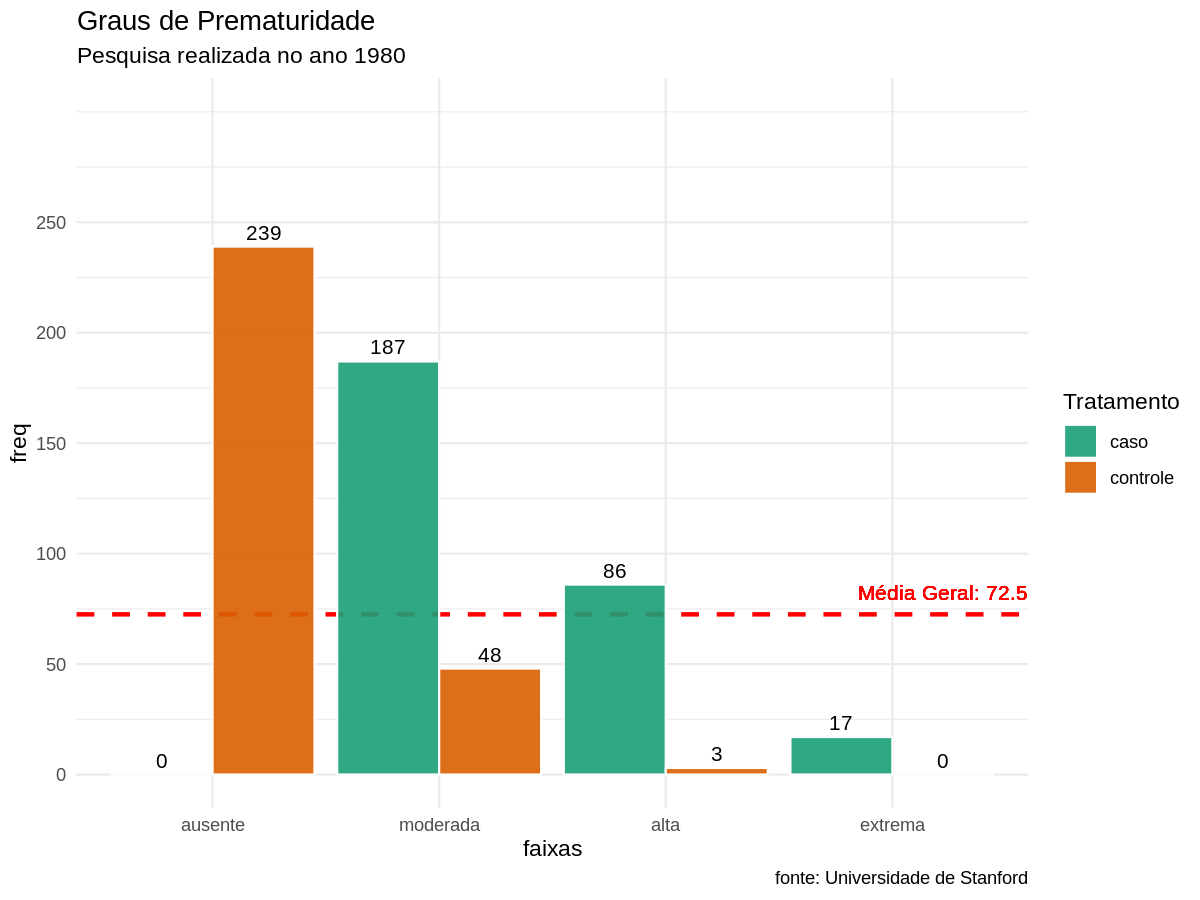

In [366]:
# Gráfico de barra por grupo de tratamento das frequências absolutas das
# categorias da variável
# Adicione uma linha horizontal com rótulo que corresponde a média geral da variável
# Salve o gráfico no formato 'png' com dimensões de 800x600 px

barplotmodel(prematABSbal,"Tratamento","Graus de Prematuridade")

O dataframe balanceado ele permanece bastante parecido com o anterior, porém a disparidade de valores da faixa ausente é bem menor se comparada aos outros subextratos. Inclusive a média caiu drásticamente graças ao balanceamento.


NULL

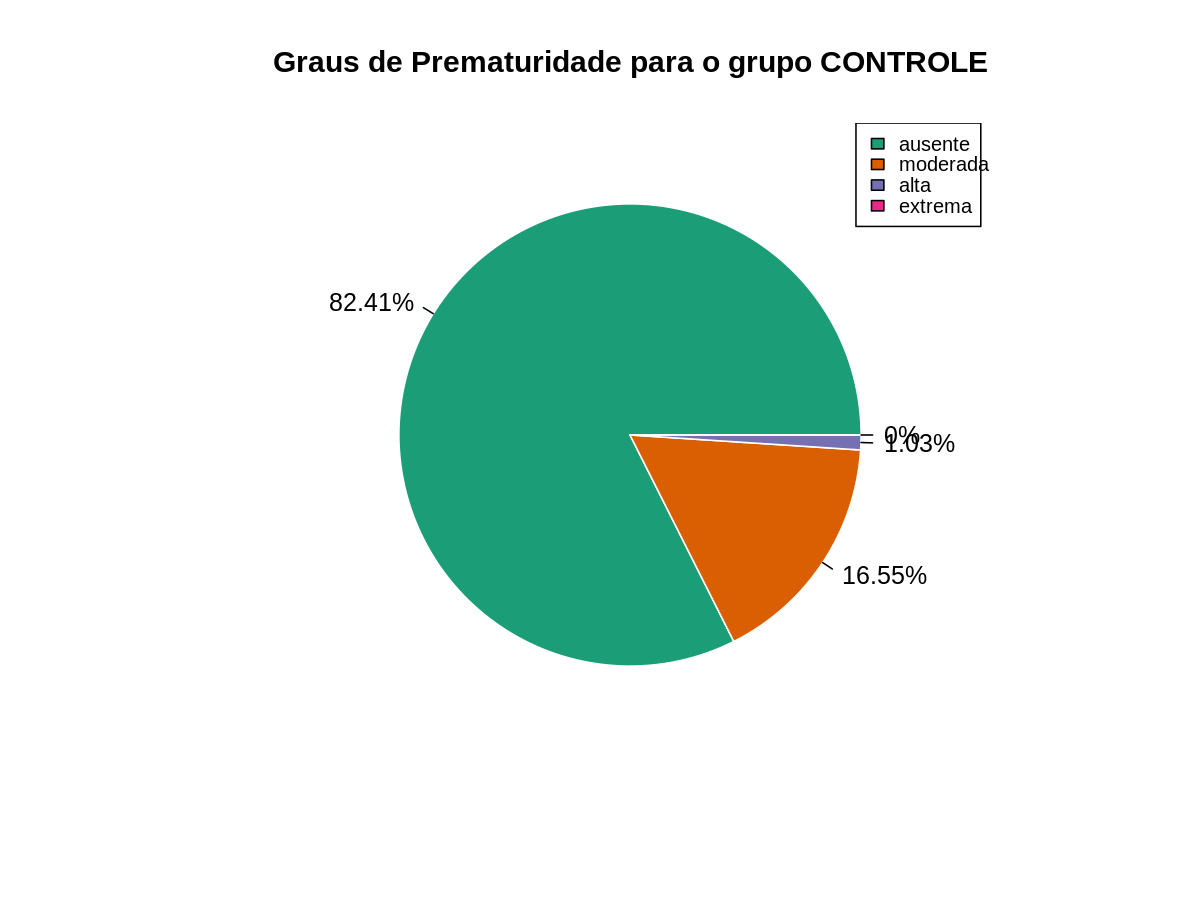

NULL

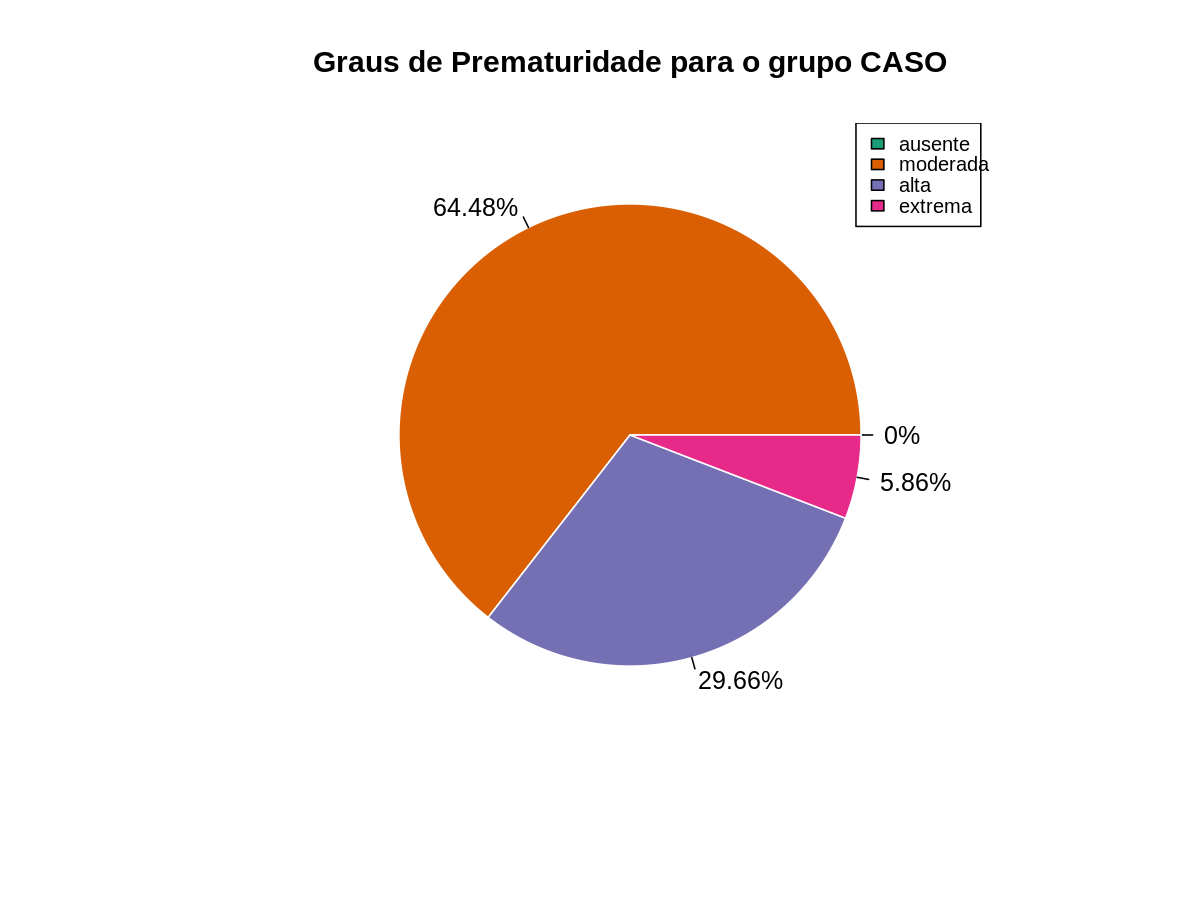

In [367]:
# Gráfico de pizza por grupo de tratamento das frequências relativas (porcentagem)
# das categorias da variável
# Salve o gráfico no formato 'png' com dimensões de 600x600 px

pieplotmodel(IHPD_bal,'controle','FPREMAT','Graus de Prematuridade para o grupo CONTROLE')
pieplotmodel(IHPD_bal,'caso','FPREMAT','Graus de Prematuridade para o grupo CASO')

Os valores relativos não mudaram muito, contudo dentro do grupo controle a projeção do grupo ausente aumentou.



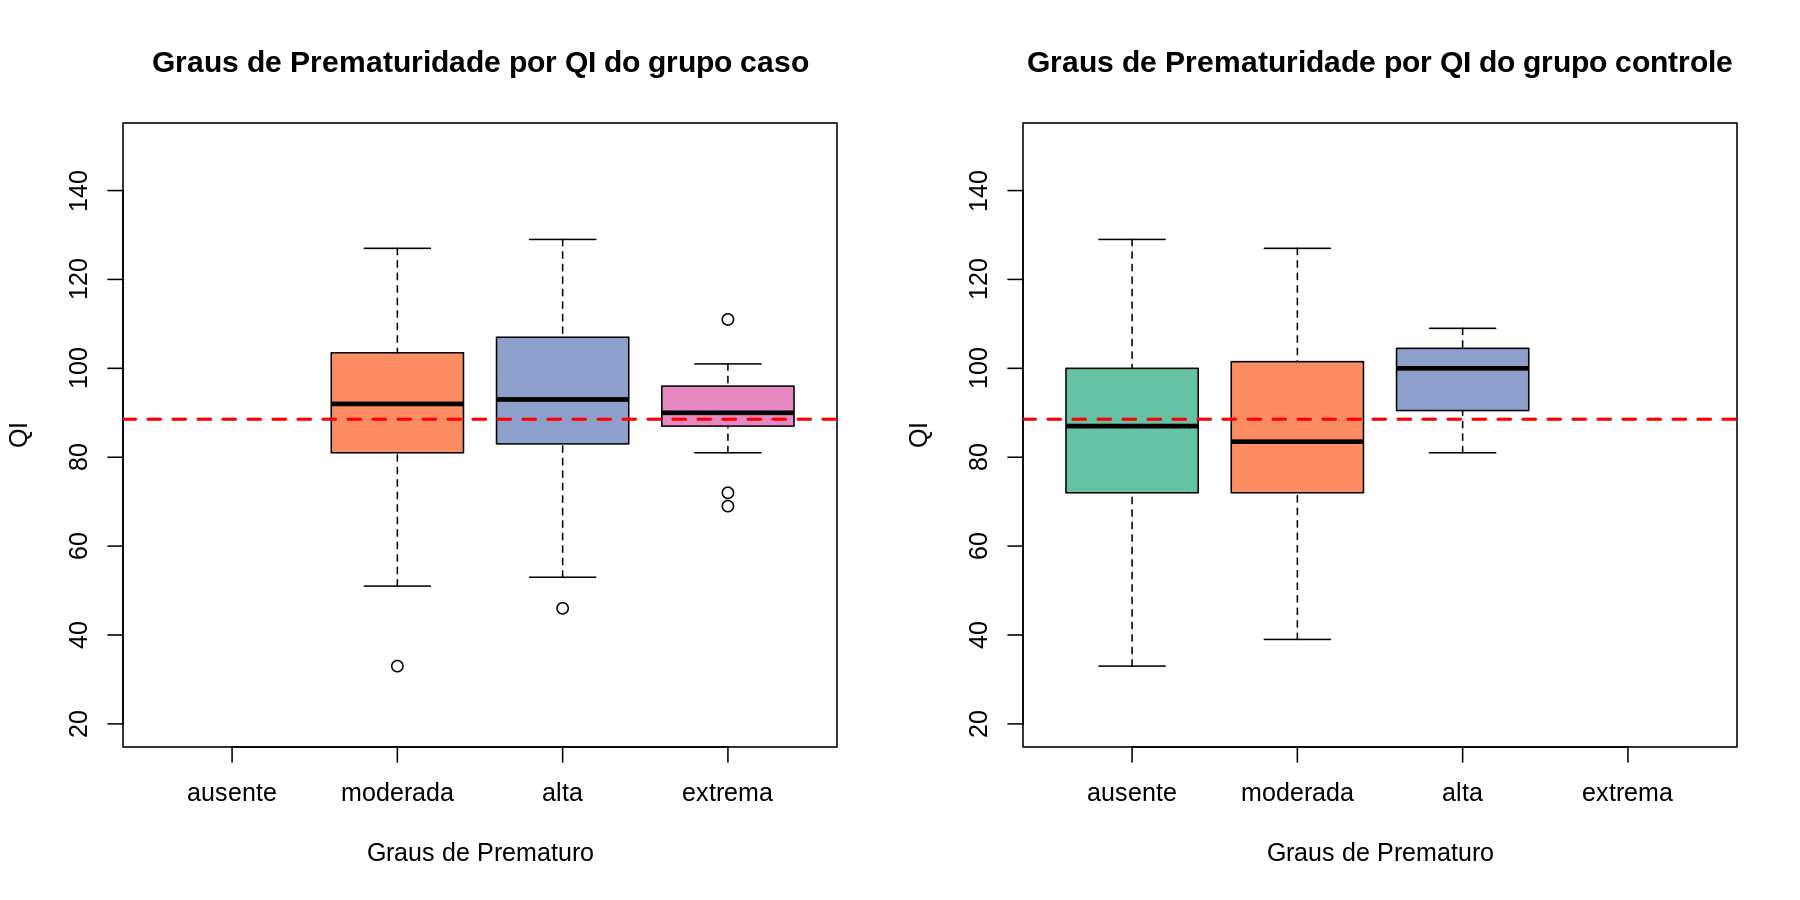

In [417]:
# Diagrama de caixa por grupo de tratamento das frequências absolutas das
# categorias da variável.
# Adicione duas linhas horizontais com rótulos que correspondem a média da variável
# nos grupos caso e controle
# Salve o gráfico no formato 'png' com dimensões de 800x600 px

boxplotmodel(IHPD_bal,'FPREMAT','Graus de Prematuridade por QI do grupo','Graus de Prematuro')

Aqui podemos ver novamente como o grupo caso consegue manter suas médias dentro de cada subextrato acima da média geral de QI, contudo é interessante analisar os casos de prematuridade alta no grupo controle e como eles se distanciam da média geral.

In [399]:
# Caso existam, defina e analise os outliers presentes em cada categoria da variável.


# Caso existam, defina e analise os outliers presentes em cada categoria da variável.

cat('\n\n-> Define o intervalo interquartil da variável contínua\n\n')
prematAusente <- subset(IHPD_bal, FPREMAT=='ausente')
summary(prematAusente$QI)

cat('\n\n-> Define os quartis de indicadores de desempenho\n\n')
qiQT = quantile(prematAusente$QI)
qiQT

cat('\n\n-> Define o valor máximo do whiskers\n\n')
wskMIN = qiQT[[2]] - 1.5*IQR(prematAusente$QI)
wskMIN

cat('\n\n-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)\n\n')
outA = subset(prematAusente, QI < wskMIN)
outA[order(outA$QI, decreasing = TRUE),]


cat('\n\n\n---------------------------------------------------------------------------------\n\n\n')


cat('\n\n-> Define o intervalo interquartil da variável contínua\n\n')
prematModerada <- subset(IHPD_bal, FPREMAT=='moderada')
summary(prematModerada$QI)

cat('\n\n-> Define os quartis de indicadores de desempenho\n\n')
qiQT = quantile(prematModerada$QI)
qiQT

cat('\n\n-> Define o valor máximo do whiskers\n\n')
wskMIN = qiQT[[2]] - 1.5*IQR(prematModerada$QI)
wskMIN

cat('\n\n-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)\n\n')
outB = subset(prematModerada, QI < wskMIN)
outB[order(outA$QI, decreasing = TRUE),]


cat('\n\n\n----------------------------------------------------------------------------------\n\n\n')

cat('\n\n-> Define o intervalo interquartil da variável contínua\n\n')
prematAlta <- subset(IHPD_bal, FPREMAT=='alta')
summary(prematAlta$QI)

cat('\n\n-> Define os quartis de indicadores de desempenho\n\n')
qiQT = quantile(prematAlta$QI)
qiQT

cat('\n\n-> Define o valor máximo do whiskers\n\n')
wskMIN = qiQT[[2]] - 1.5*IQR(prematAlta$QI)
wskMIN

cat('\n\n-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)\n\n')
outB = subset(prematAlta, QI < wskMIN)
outB[order(outA$QI, decreasing = TRUE),]


cat('\n\n\n----------------------------------------------------------------------------------\n\n\n')

cat('\n\n-> Define o intervalo interquartil da variável contínua\n\n')
prematExtrema <- subset(IHPD_bal, FPREMAT=='extrema')
summary(prematExtrema$QI)

cat('\n\n-> Define os quartis de indicadores de desempenho\n\n')
qiQT = quantile(prematExtrema$QI)
qiQT

cat('\n\n-> Define o valor máximo do whiskers\n\n')
wskMIN = qiQT[[2]] - 1.5*IQR(prematExtrema$QI)
wskMIN

cat('\n\n-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)\n\n')
outB = subset(prematExtrema, QI < wskMIN)
outB[order(outA$QI, decreasing = TRUE),]


cat('\n\n\n----------------------------------------------------------------------------------\n\n\n')



-> Define o intervalo interquartil da variável contínua



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   72.00   87.00   84.83  100.00  129.00 



-> Define os quartis de indicadores de desempenho



0%  25%  50%  75% 100% 
  33   72   87  100  129



-> Define o valor máximo do whiskers



[1] 30



-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)



IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPREMAT
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>





---------------------------------------------------------------------------------




-> Define o intervalo interquartil da variável contínua



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   79.00   90.00   90.26  103.00  127.00 



-> Define os quartis de indicadores de desempenho



0%  25%  50%  75% 100% 
  33   79   90  103  127



-> Define o valor máximo do whiskers



[1] 43



-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)



IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPREMAT
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>





----------------------------------------------------------------------------------




-> Define o intervalo interquartil da variável contínua



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  46.00   83.00   93.00   93.72  107.00  129.00 



-> Define os quartis de indicadores de desempenho



0%  25%  50%  75% 100% 
  46   83   93  107  129



-> Define o valor máximo do whiskers



[1] 47



-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)



IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPREMAT
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>





----------------------------------------------------------------------------------




-> Define o intervalo interquartil da variável contínua



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  69.00   87.00   90.00   90.12   96.00  111.00 



-> Define os quartis de indicadores de desempenho



0%  25%  50%  75% 100% 
  69   87   90   96  111



-> Define o valor máximo do whiskers



[1] 73.5



-> Define as mães que se diferenciam drasticamente de todas as outras (outliers)



IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPREMAT
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>





----------------------------------------------------------------------------------




O código não acusou valores outliers dentro dos subextratos de prematuridade

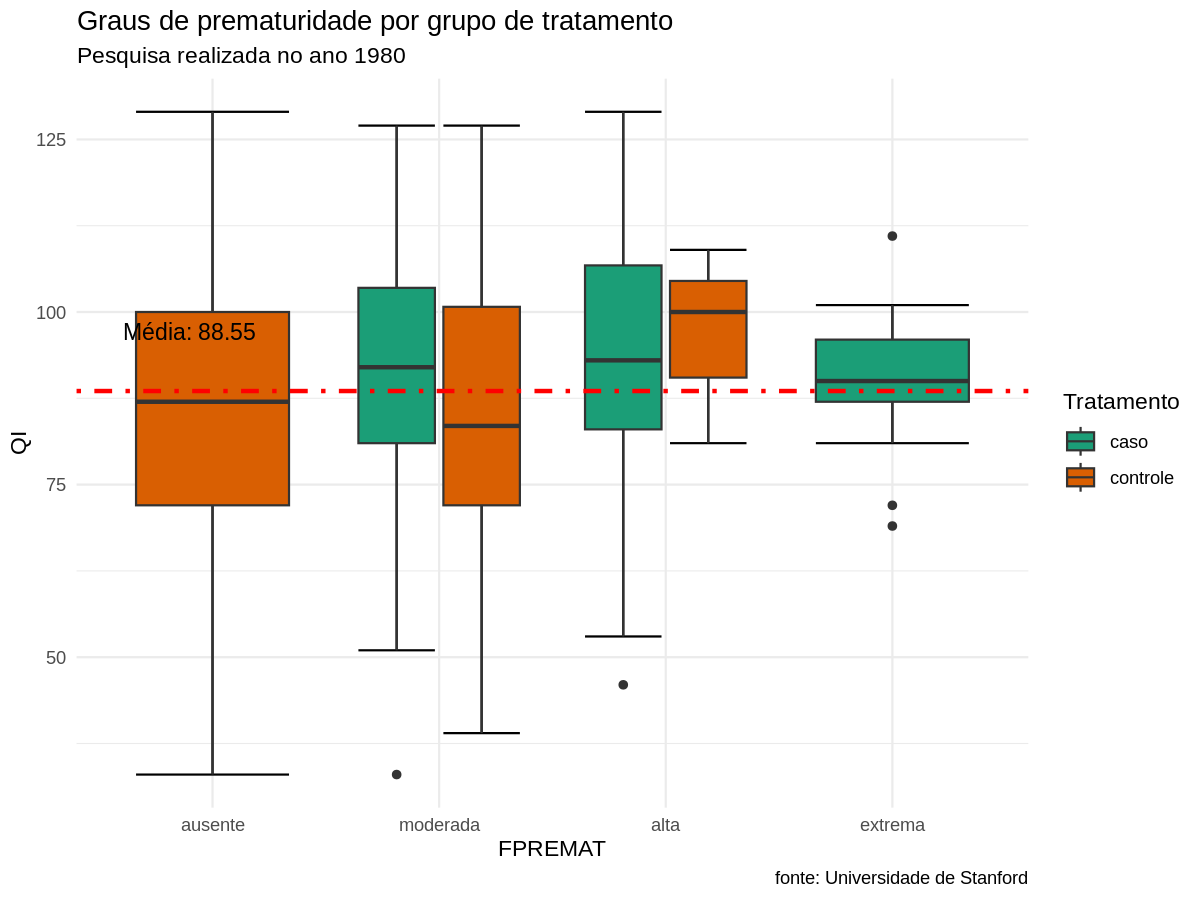

In [369]:
# Histograma de frequência por grupo de tratamento de todas as categorias da variável
# Adicione duas linhas verticais com rótulos que correspondem a média da variável
# nos grupos caso e controle


# Define área e resolução de saída da plotagem do gráfico
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 150)

bx1 <- ggplot(data = IHPD_bal, mapping = aes(x=FPREMAT, y=QI, fill=TRT)) +
        stat_boxplot(geom = "errorbar") +
        geom_boxplot() +
        scale_fill_brewer(palette="Dark2") +
        geom_hline(
            aes(yintercept=mean(QI)),
            lty=4,
            lwd=1,
            color='red'
        ) +
        annotate(
            "text",
            x = .9,
            y = mean(IHPD_bal$QI)+5,
            label = paste('Média:',round(mean(IHPD_bal$QI),2)),
            vjust = -1,
            angle = 0
        ) +
        labs(
            xlab = '',
            fill = 'Tratamento',
            title = 'Graus de prematuridade por grupo de tratamento',
            subtitle = 'Pesquisa realizada no ano 1980',
            caption = 'fonte: Universidade de Stanford'
        ) +
        theme_minimal()

ggsave(
    filename = '/content/hospBx.pdf',
    width = 16,
    height = 11,
    units = 'cm',
    bg = 'transparent'
)

bx1

Nesse gráfico podemos observar como o grupo caso, possuem médias acima do geral, e um desempenho superior em casos moderados de prematuridade.


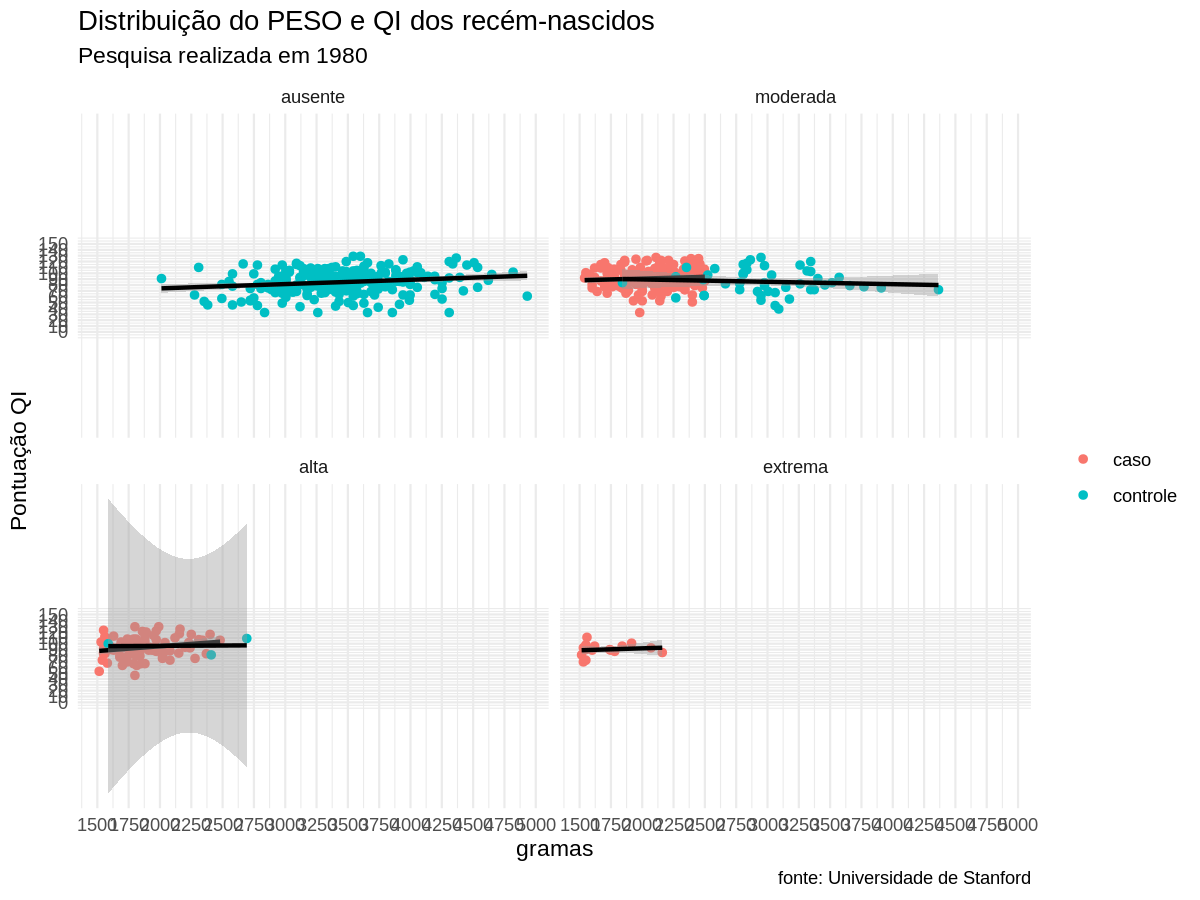

In [368]:
# Gráfico de dispersão por grupo de tratamento entre PESO e QI de todas as
# categorias da variável.
# Adicione uma linha de regressão linear com intervalo de confianca de 95% por
# grupo de tratamento

scatterplotmodel(IHPD_bal,'FPREMAT')

Este gráfico não nos diz muita coisa, apenas o comportamento dos dados estarem mais horizontalizados no dataframe balanceado, mantendo a tendencia positiva, porém aqui não há uma inclinação expressiva.